In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"nafizfahad","key":"63168f644d580e7ccc514b4a9e6d6f20"}'}

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: creditcard.csv          


In [ ]:
# Import necessary libraries
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Step 1: Load the dataset (assuming it's already loaded as df)
df = pd.read_csv('creditcard.csv')
df.head(5)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Decision Tree Performance (Training Metrics):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Decision Tree Performance (Testing Metrics):
Accuracy: 0.9960499982444436
Precision: 0.2832764505119454
Recall: 0.8469387755102041
F1 Score: 0.42455242966751916


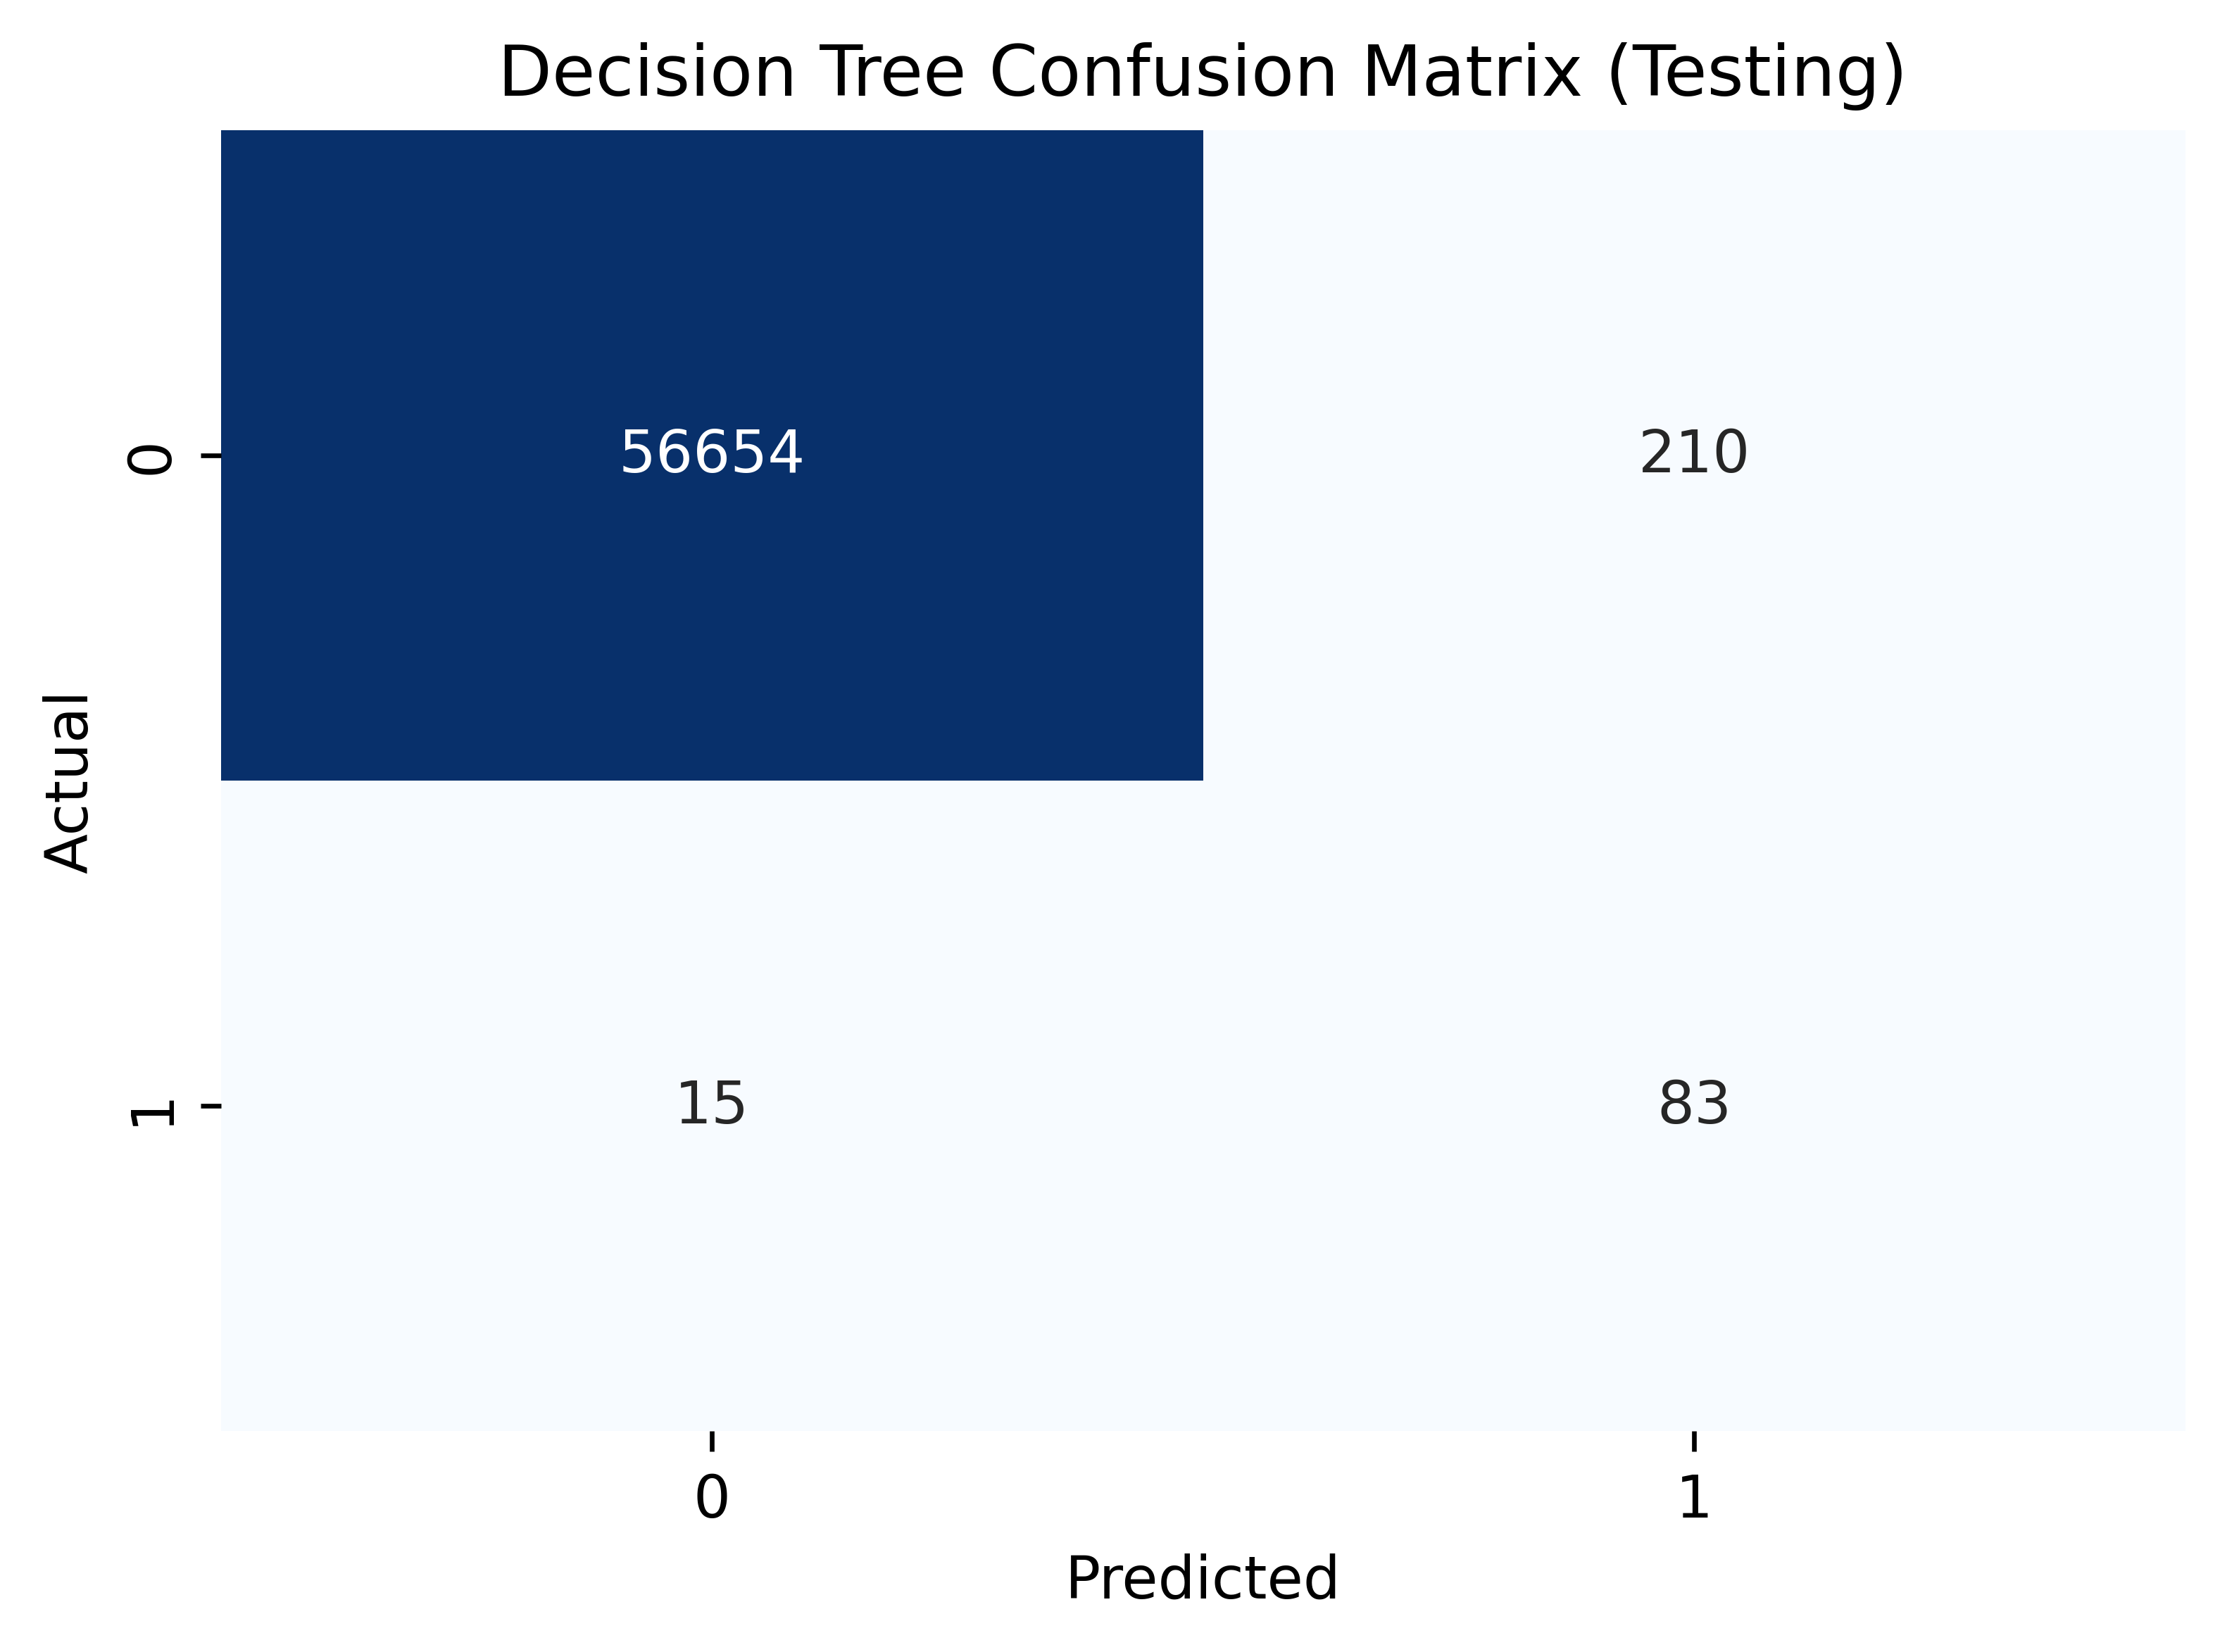

Random Forest Performance (Training Metrics):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Random Forest Performance (Testing Metrics):
Accuracy: 0.9991046662687406
Precision: 0.688
Recall: 0.8775510204081632
F1 Score: 0.7713004484304932


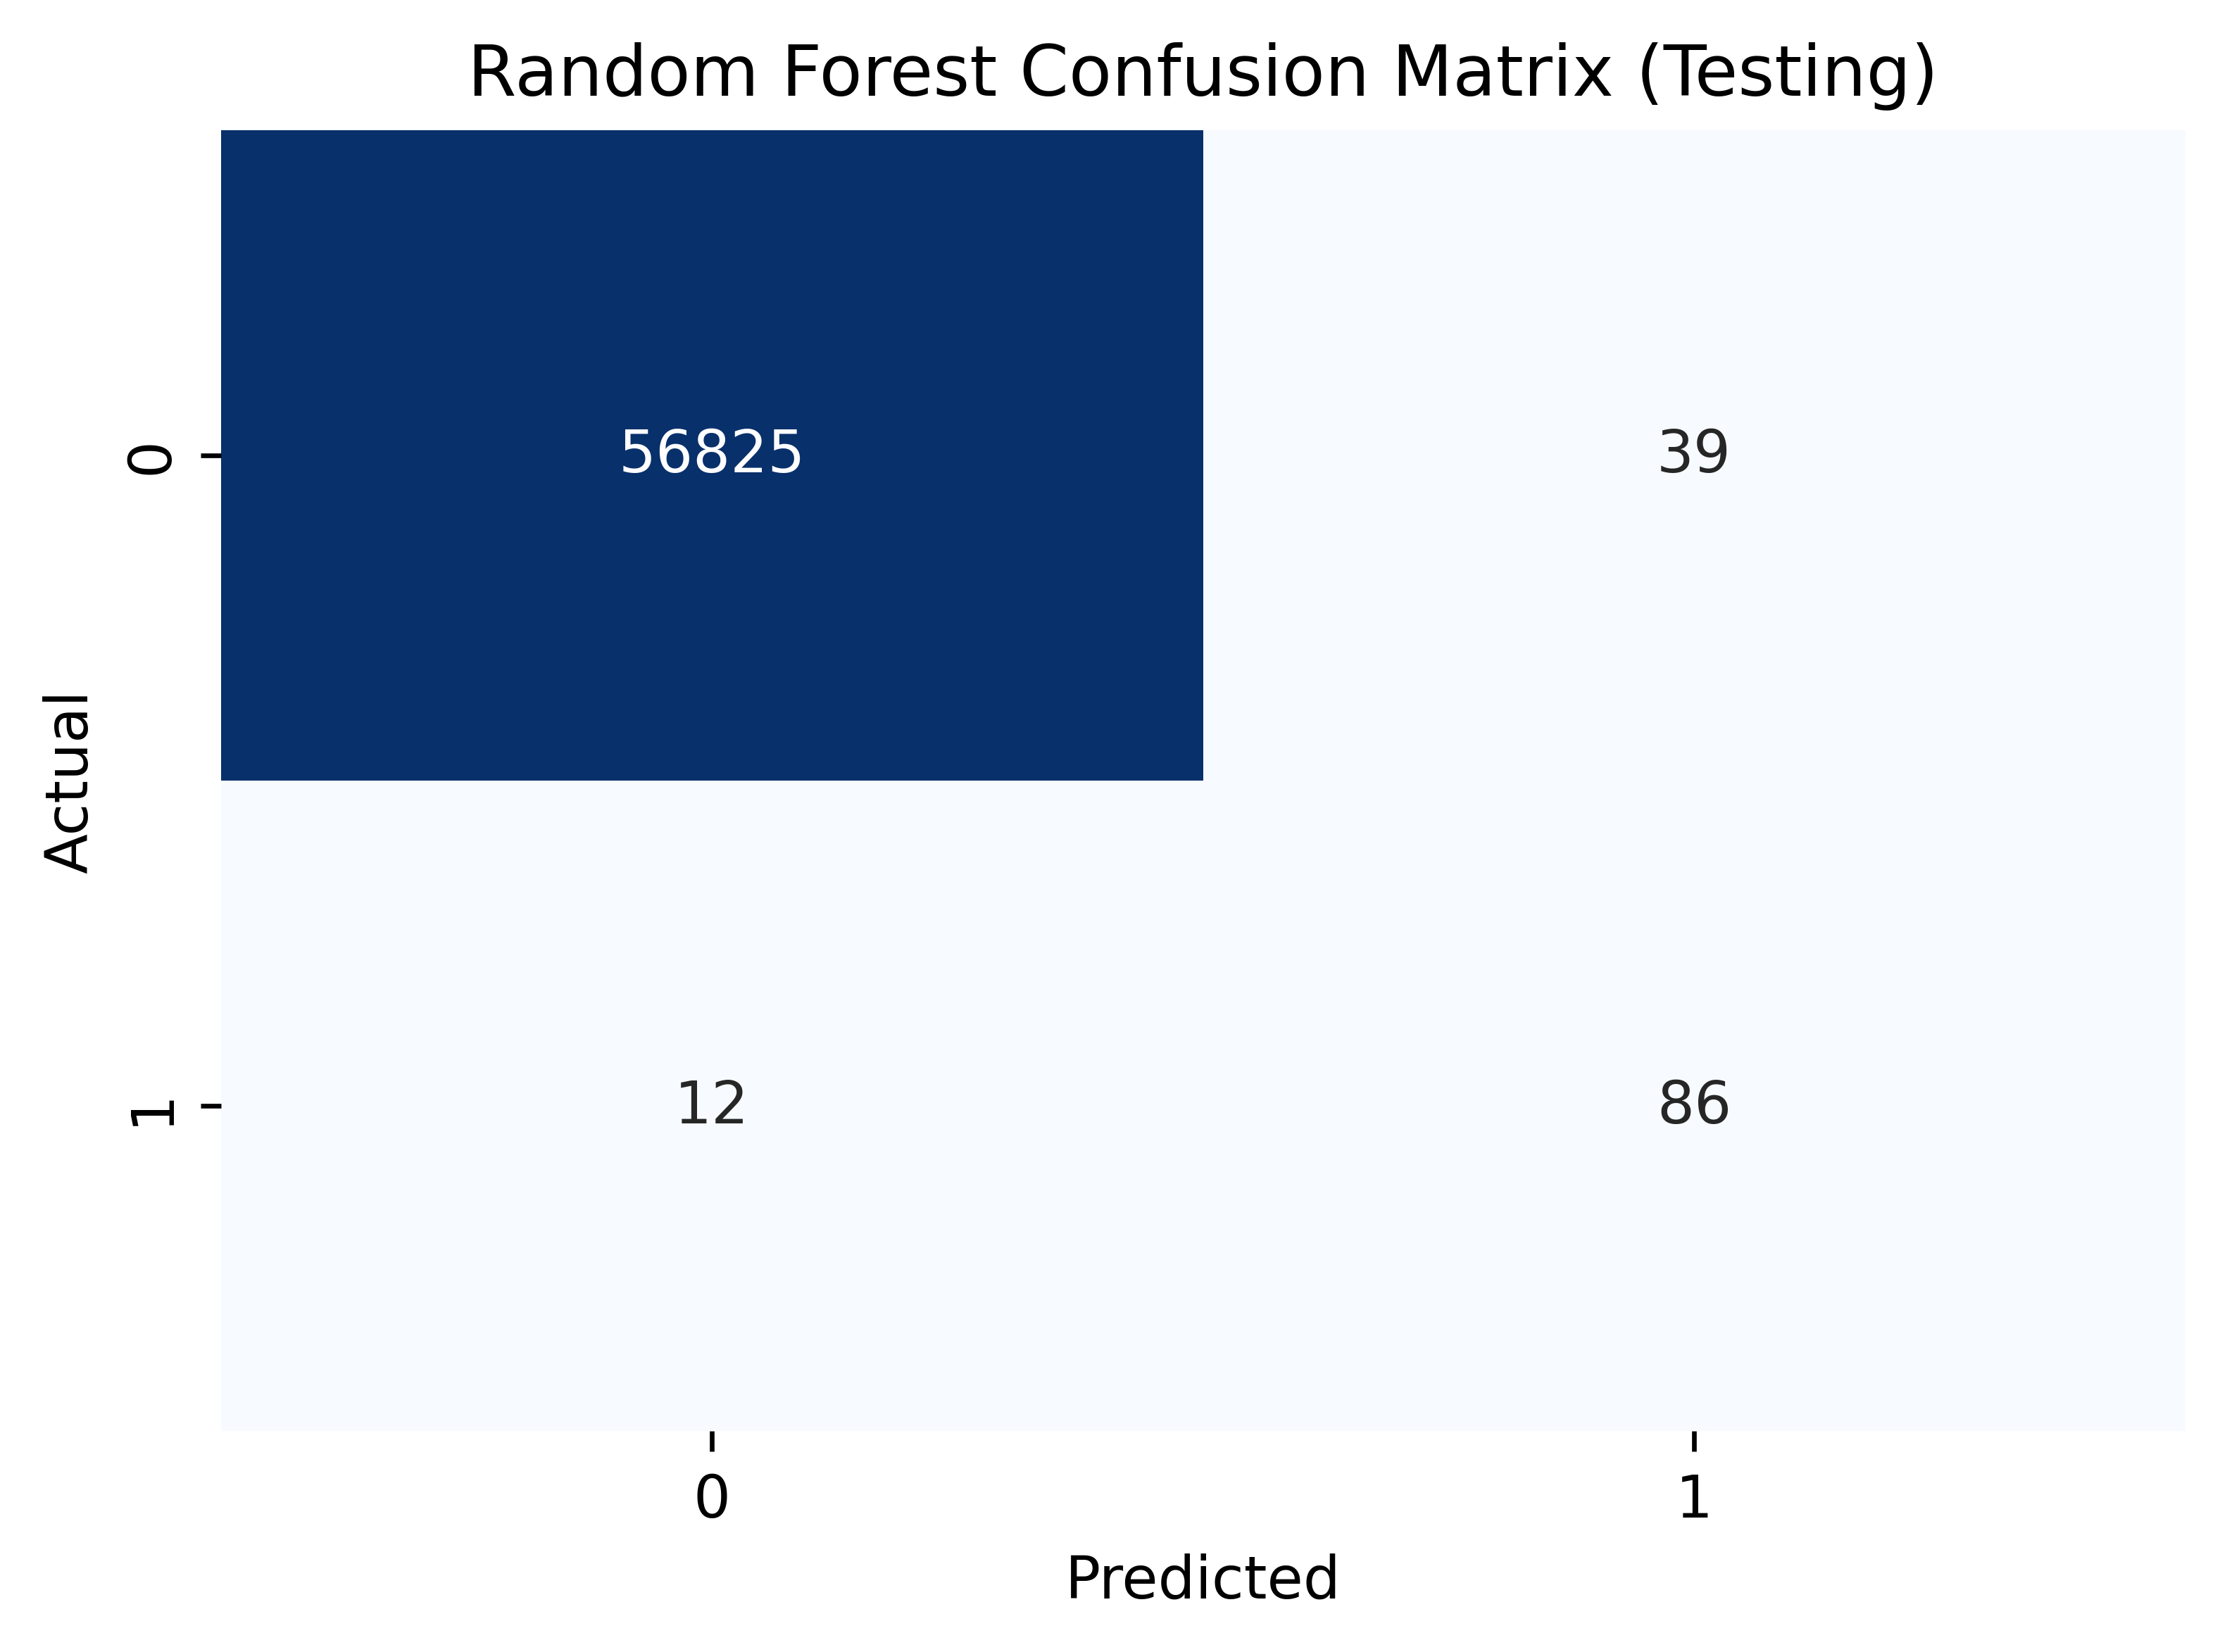

SVM Performance (Training Metrics):
Accuracy: 0.9607607792447604
Precision: 0.9776534021248182
Recall: 0.9430778497346681
F1 Score: 0.9600544244480349
SVM Performance (Testing Metrics):
Accuracy: 0.9779151012956006
Precision: 0.0658682634730539
Recall: 0.8979591836734694
F1 Score: 0.12273361227336124


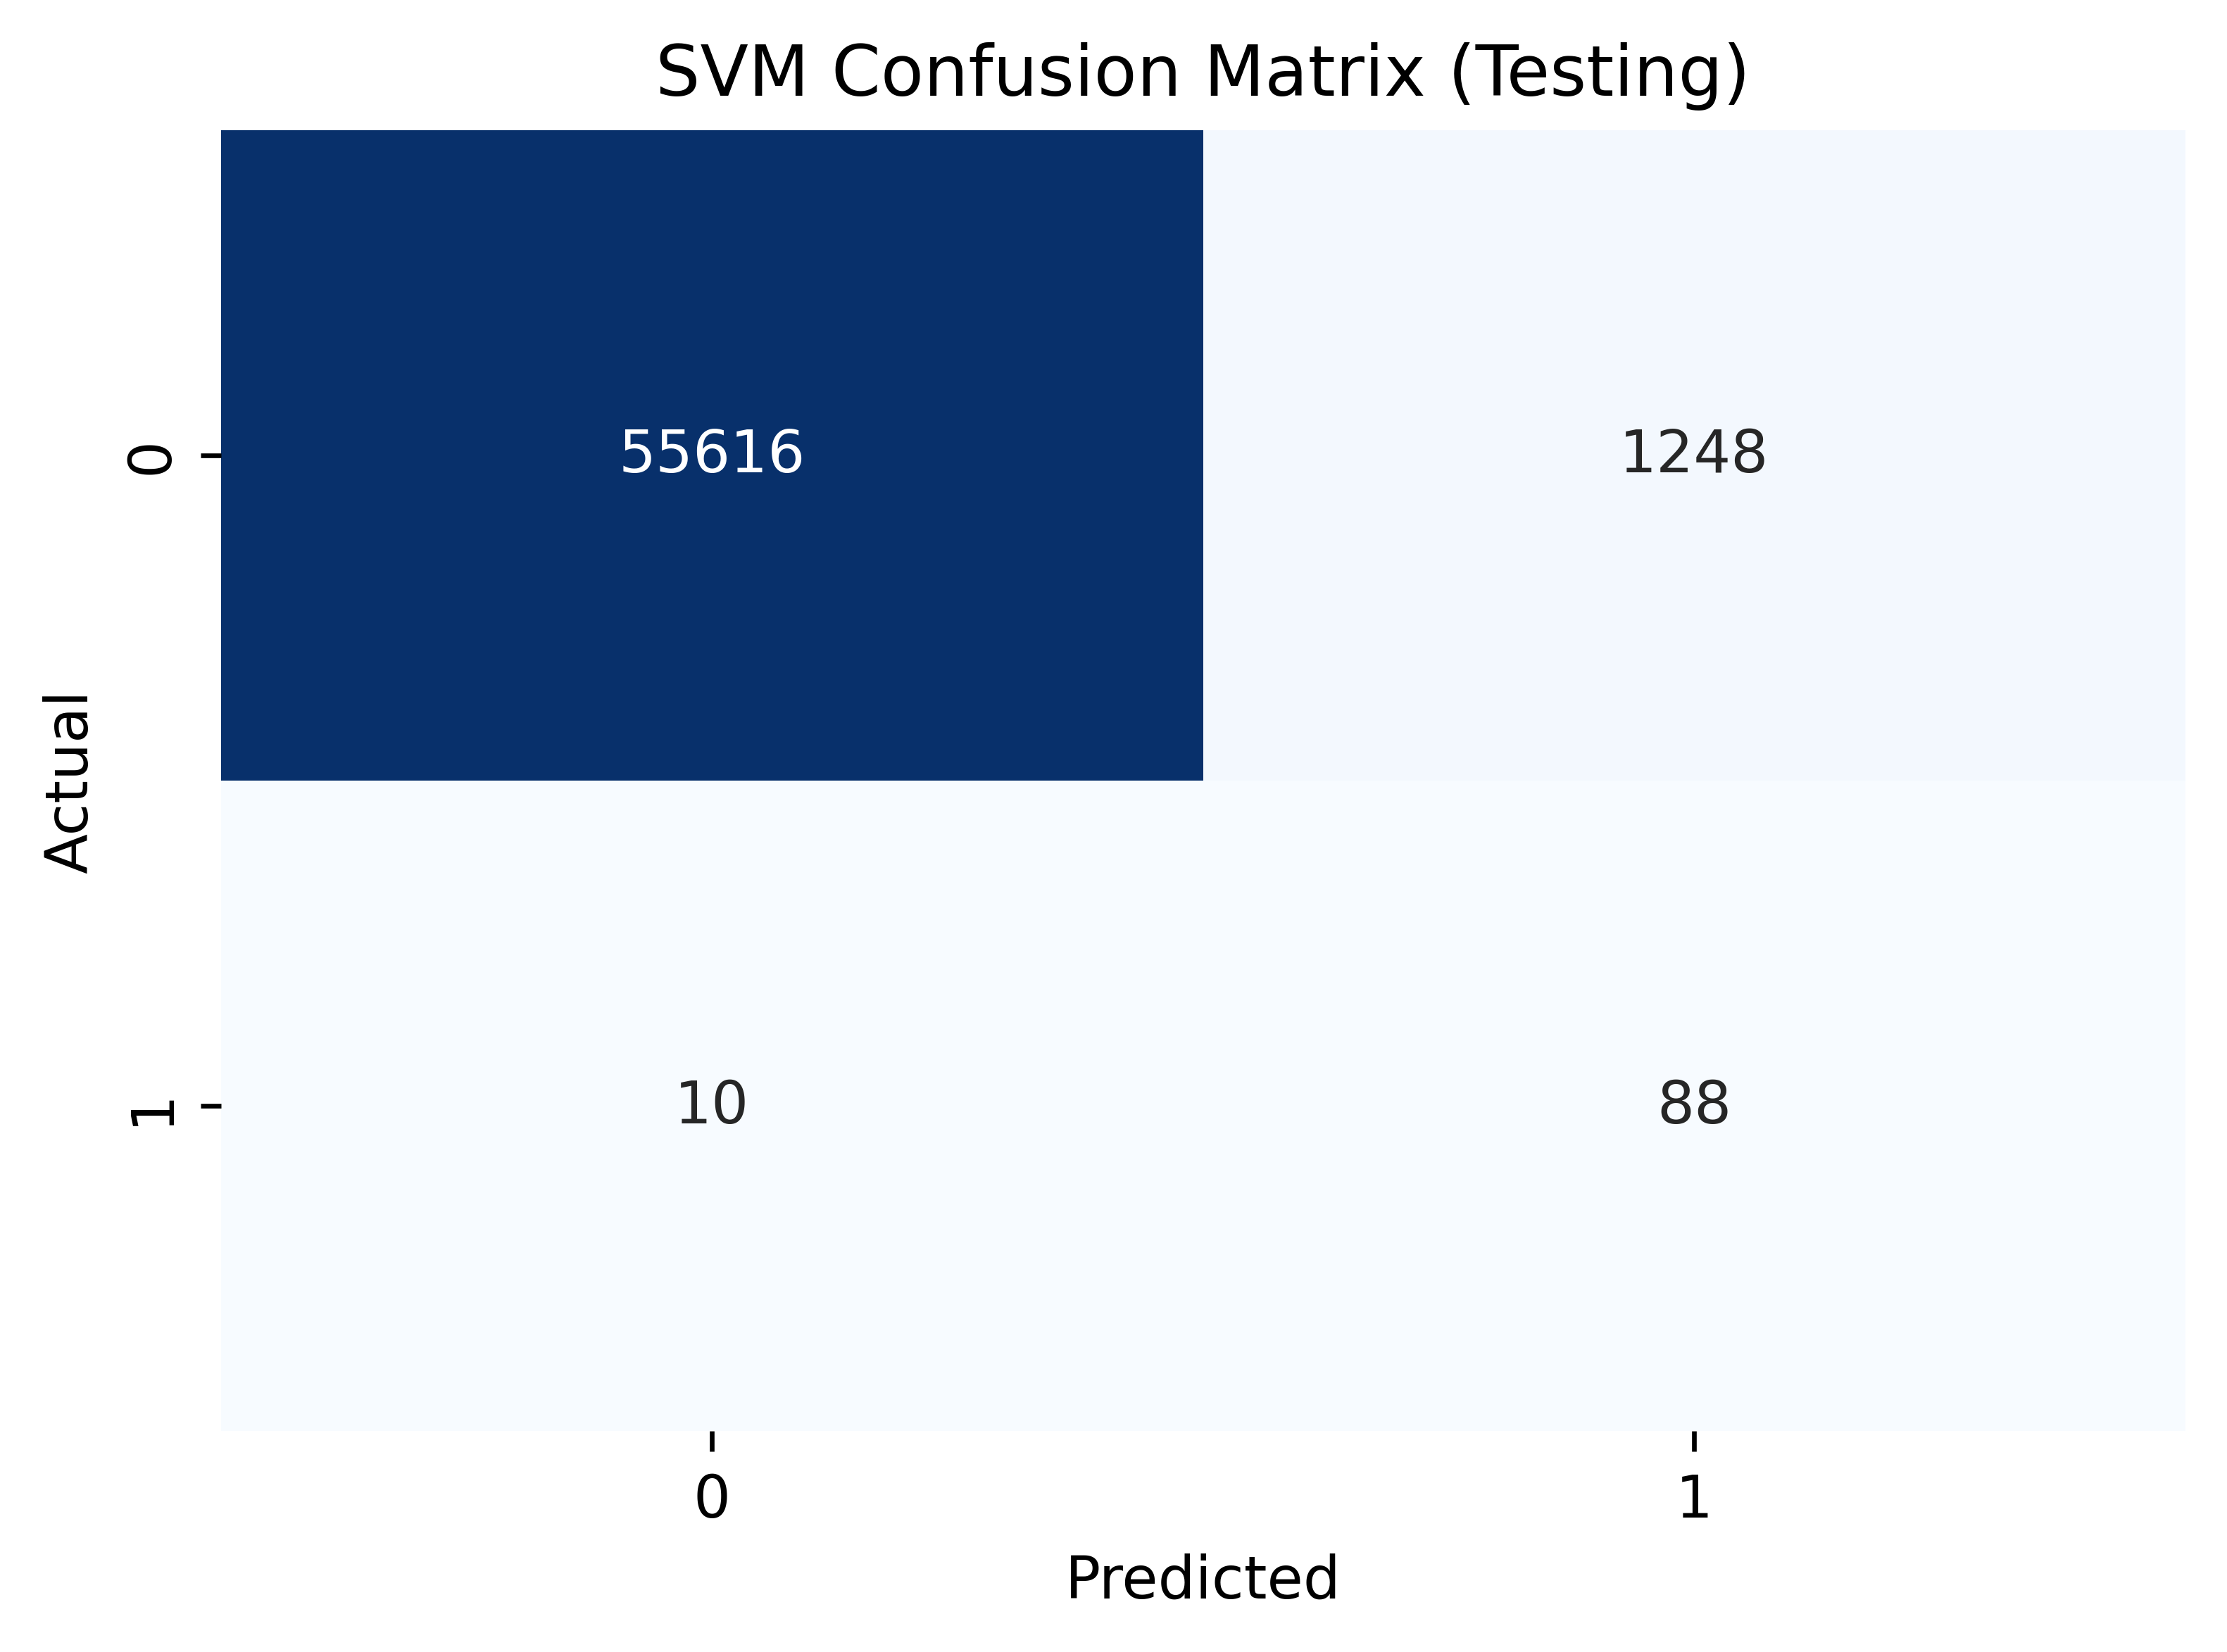

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Randomized Search completed in 1089.47 seconds
Customized Random Forest Performance (Training Metrics):
Accuracy: 0.9998659051839737
Precision: 0.9997450616687032
Recall: 0.9999868103459646
F1 Score: 0.9998659213947692
Customized Random Forest Performance (Testing Metrics):
Accuracy: 0.9987711105649381
Precision: 0.5972222222222222
Recall: 0.8775510204081632
F1 Score: 0.7107438016528925


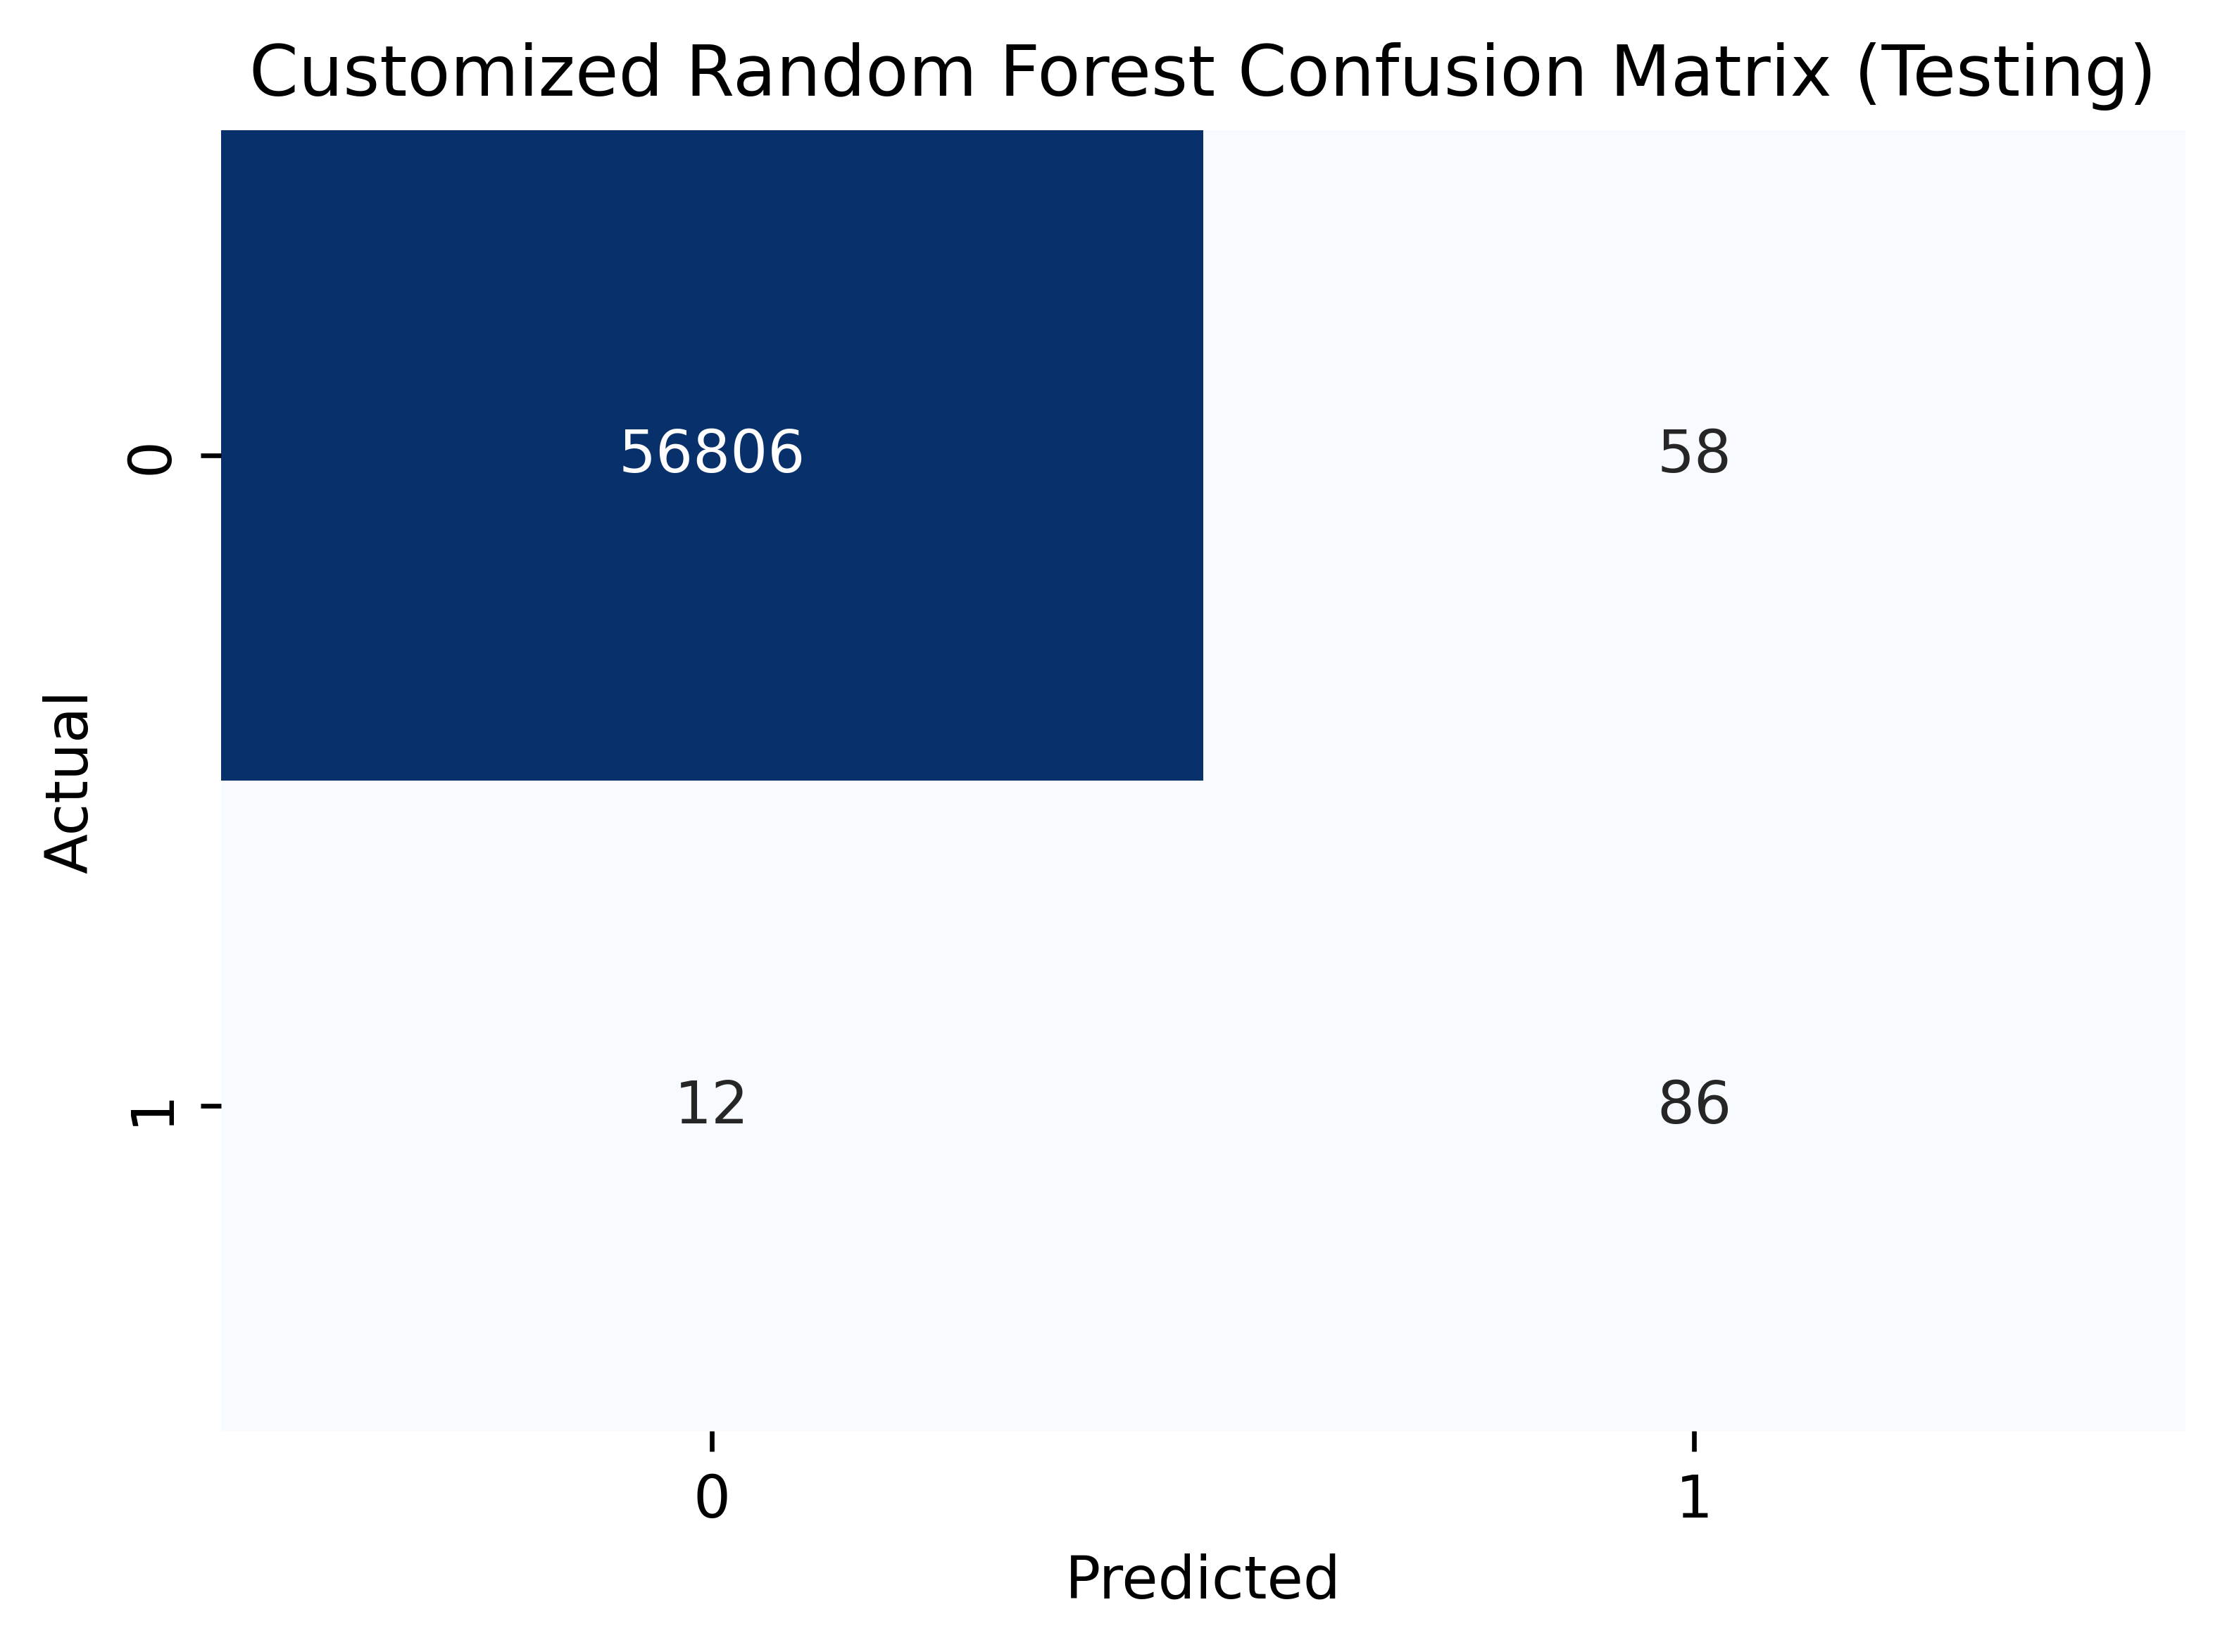

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

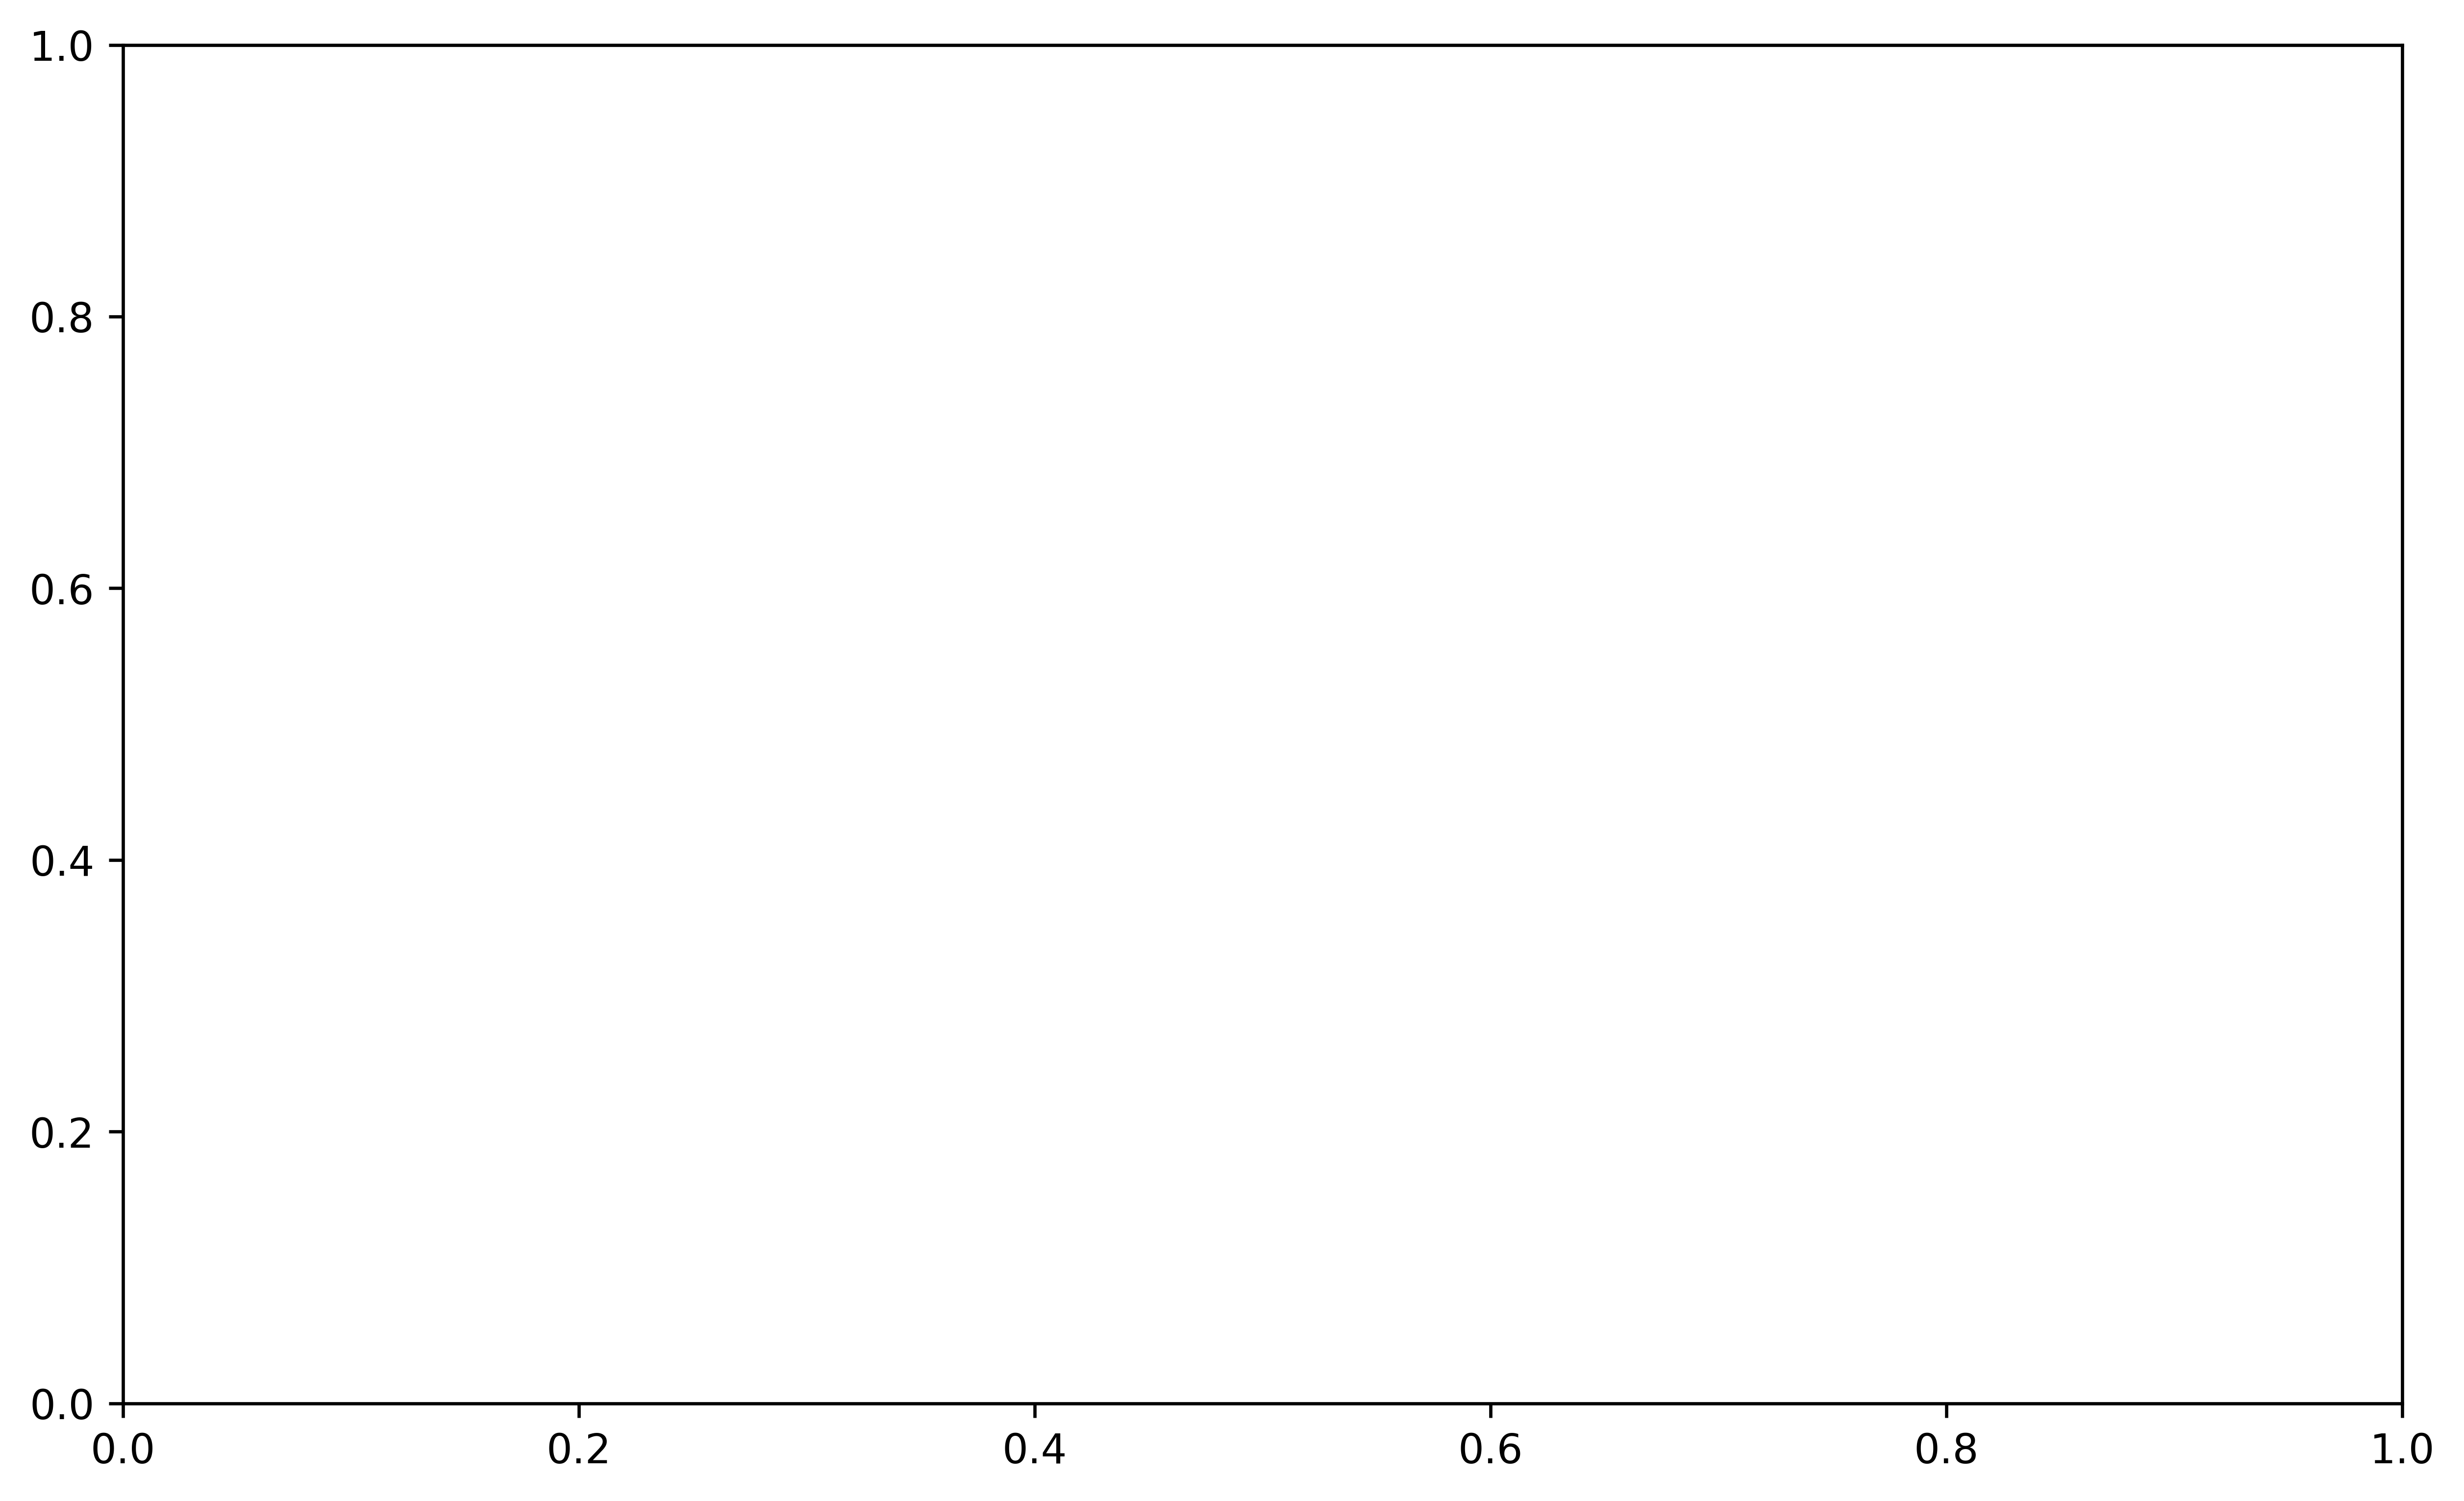

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import time
import platform
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset (assuming it's already loaded as df)

# Step 2: Feature Selection - Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Step 3: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Addressing Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Step 6: Feature Extraction using PCA (95% variance retained)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_smote)
X_test_pca = pca.transform(X_test_scaled)

# Step 7: Model Training and Evaluation

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Training metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Testing metrics
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Confusion matrix for testing
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"{model_name} Performance (Training Metrics):")
    print(f"Accuracy: {train_accuracy}")
    print(f"Precision: {train_precision}")
    print(f"Recall: {train_recall}")
    print(f"F1 Score: {train_f1}")

    print(f"{model_name} Performance (Testing Metrics):")
    print(f"Accuracy: {test_accuracy}")
    print(f"Precision: {test_precision}")
    print(f"Recall: {test_recall}")
    print(f"F1 Score: {test_f1}")

    # Plot confusion matrix for testing
    plt.figure(figsize=(6,4), dpi=600)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{model_name} Confusion Matrix (Testing)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return [train_accuracy, train_precision, train_recall, train_f1], [test_accuracy, test_precision, test_recall, test_f1]

# Initialize lists to store evaluation metrics for each model
train_metrics_list = []
test_metrics_list = []

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train_smote)
dt_train_metrics, dt_test_metrics = evaluate_model(dt, X_train_pca, X_test_pca, y_train_smote, y_test, "Decision Tree")
train_metrics_list.append(dt_train_metrics)
test_metrics_list.append(dt_test_metrics)

# Standard Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_pca, y_train_smote)
rf_train_metrics, rf_test_metrics = evaluate_model(rf, X_train_pca, X_test_pca, y_train_smote, y_test, "Random Forest")
train_metrics_list.append(rf_train_metrics)
test_metrics_list.append(rf_test_metrics)

# Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train_pca, y_train_smote)
svm_train_metrics, svm_test_metrics = evaluate_model(svm, X_train_pca, X_test_pca, y_train_smote, y_test, "SVM")
train_metrics_list.append(svm_train_metrics)
test_metrics_list.append(svm_test_metrics)

# Step 8: Customized Random Forest with RandomizedSearchCV for Hyperparameter Tuning

param_dist = {
    'n_estimators': [50, 100, 150],  # Reduced number of estimators
    'max_depth': [10, 20],  # Fewer depth levels
    'min_samples_split': [2, 5],  # Keeping a reasonable range
    'min_samples_leaf': [1, 2],  # Keeping a smaller range to reduce combinations
    'max_features': ['sqrt', 'log2']  # Reduce features to be considered at each split
}

custom_rf = RandomForestClassifier(random_state=42)

# Using RandomizedSearchCV to reduce the runtime
random_search_rf = RandomizedSearchCV(estimator=custom_rf,
                                      param_distributions=param_dist,
                                      n_iter=10,  # Only 10 combinations will be tested
                                      cv=3,  # Use 3-fold cross-validation
                                      n_jobs=-1,  # Utilize all cores for parallel processing
                                      verbose=2,
                                      random_state=42,
                                      scoring='accuracy')

# Measure time
start_time = time.time()

random_search_rf.fit(X_train_pca, y_train_smote)

# Best parameters from Randomized Search
best_rf_random = random_search_rf.best_estimator_

# Measure end time and print duration
end_time = time.time()
print(f"Randomized Search completed in {(end_time - start_time):.2f} seconds")

# Evaluate the model using the best parameters
custom_rf_train_metrics, custom_rf_test_metrics = evaluate_model(best_rf_random, X_train_pca, X_test_pca, y_train_smote, y_test, "Customized Random Forest")
train_metrics_list.append(custom_rf_train_metrics)
test_metrics_list.append(custom_rf_test_metrics)




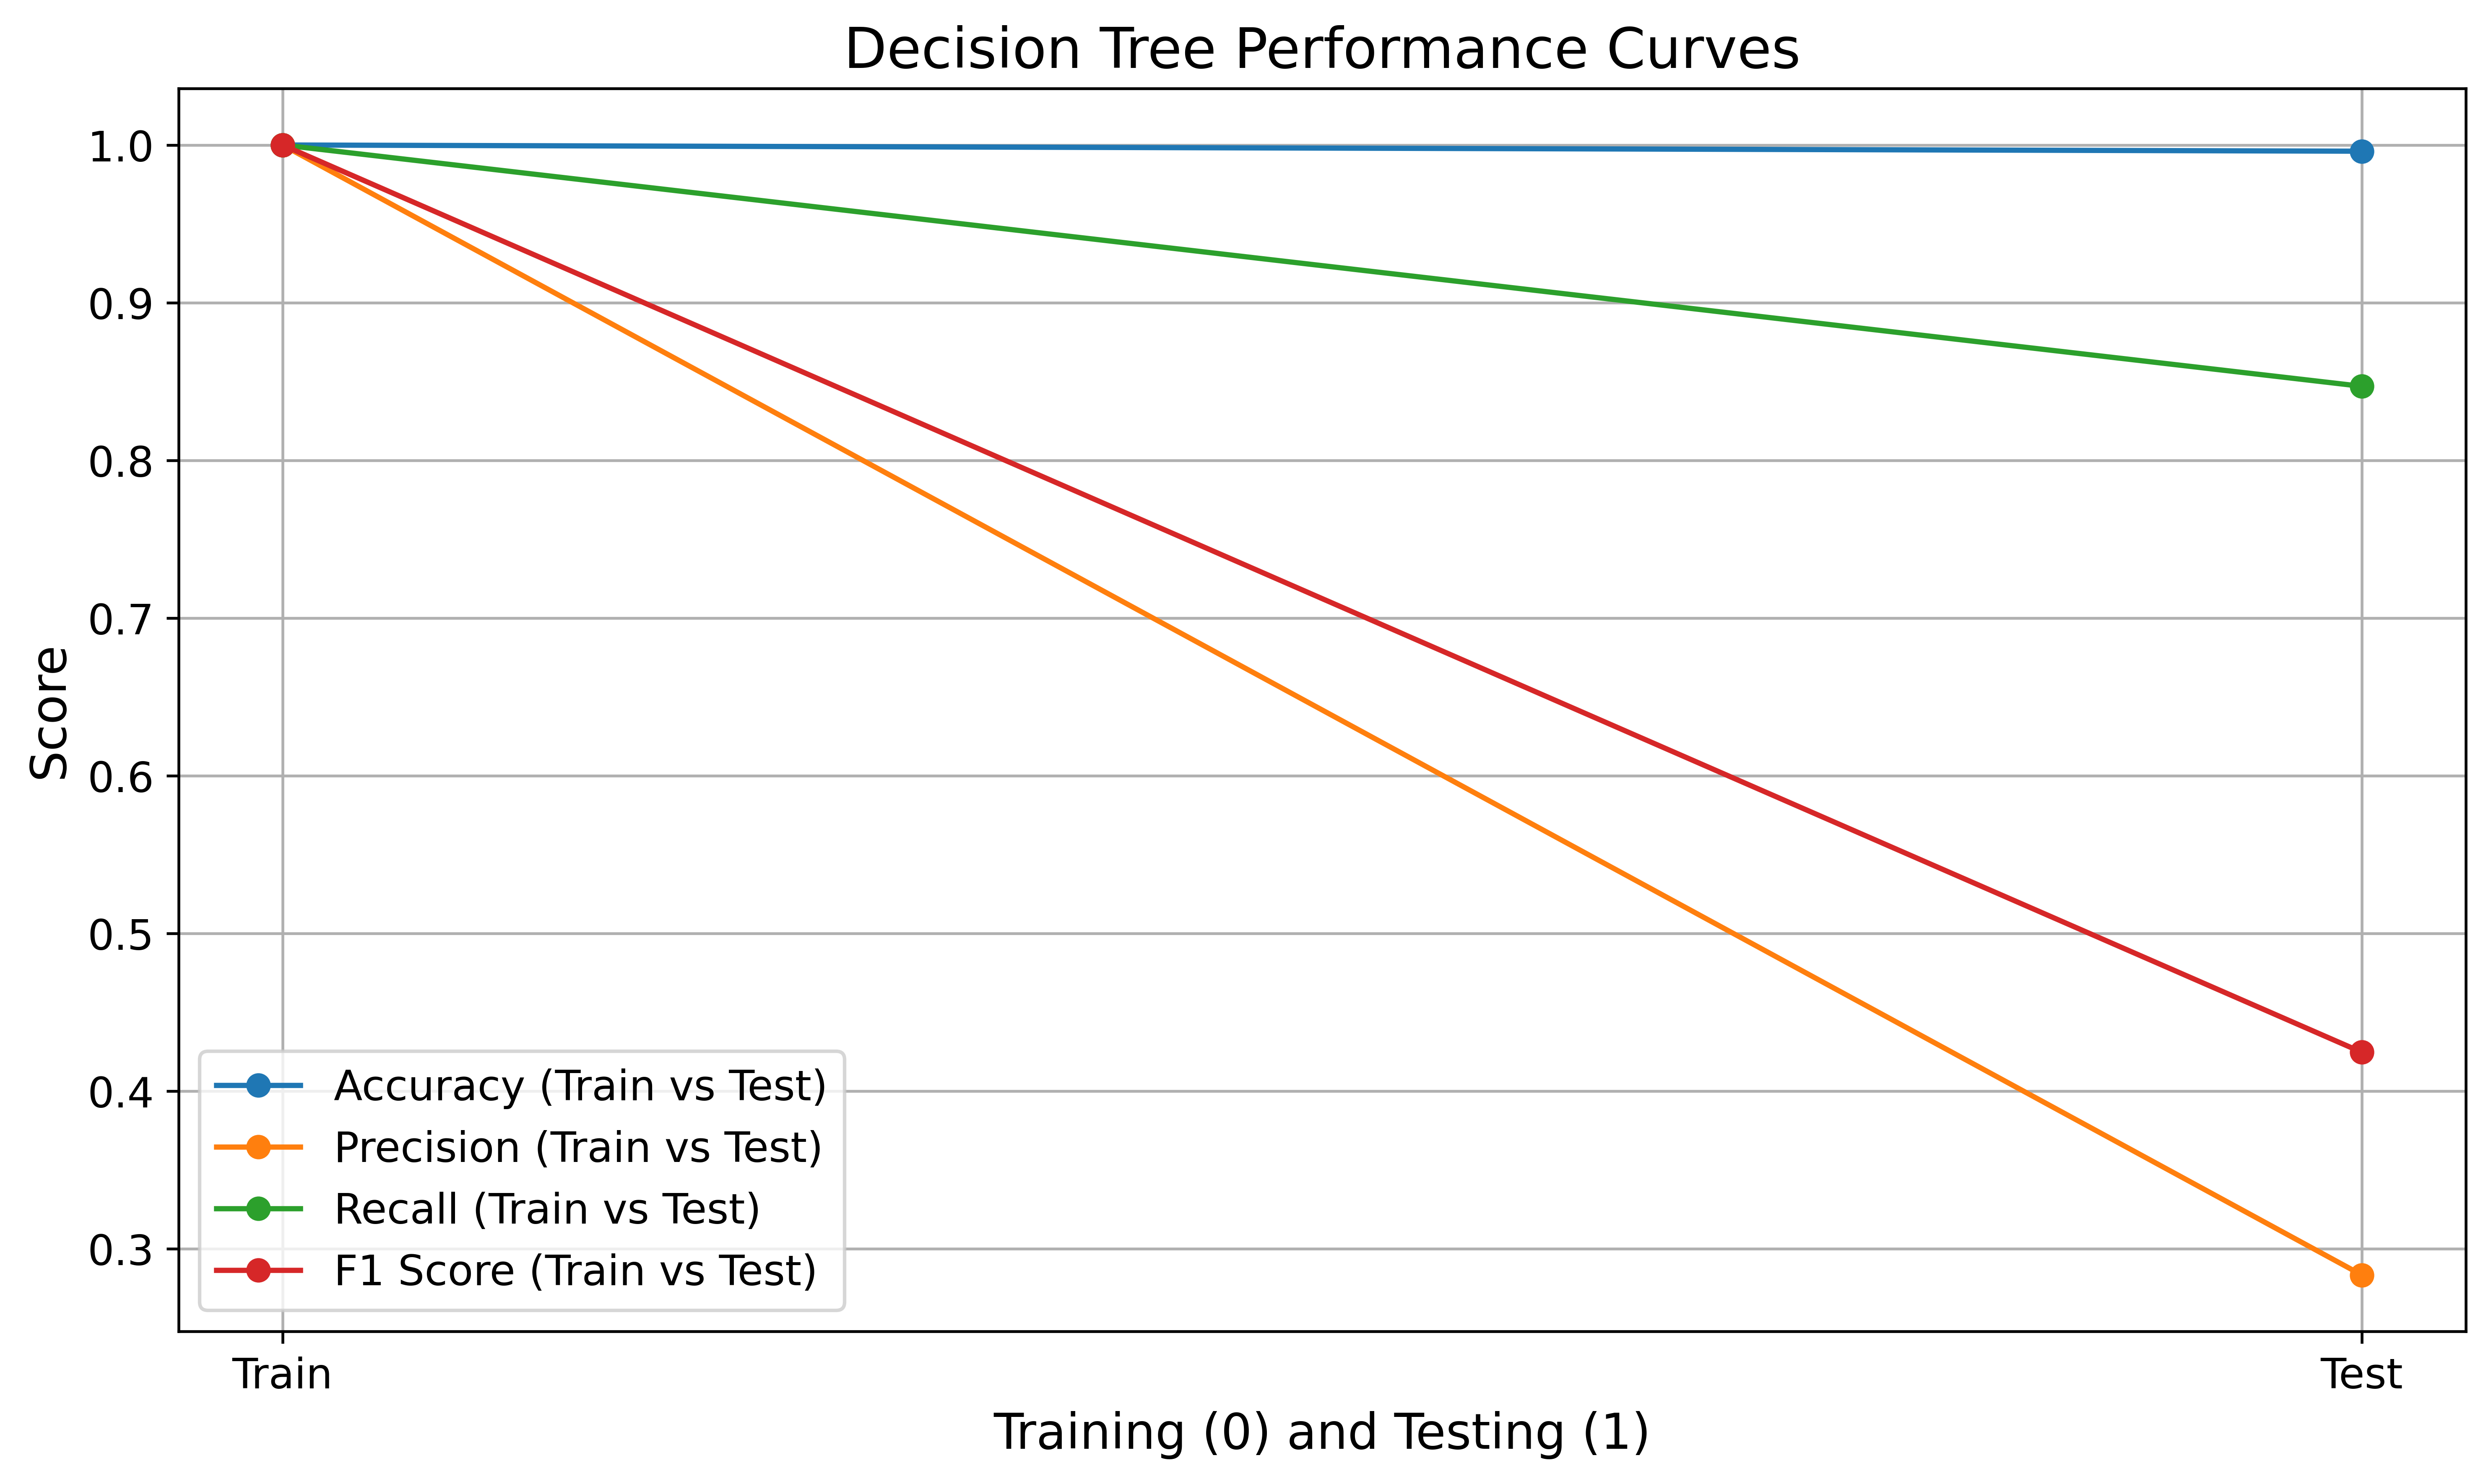

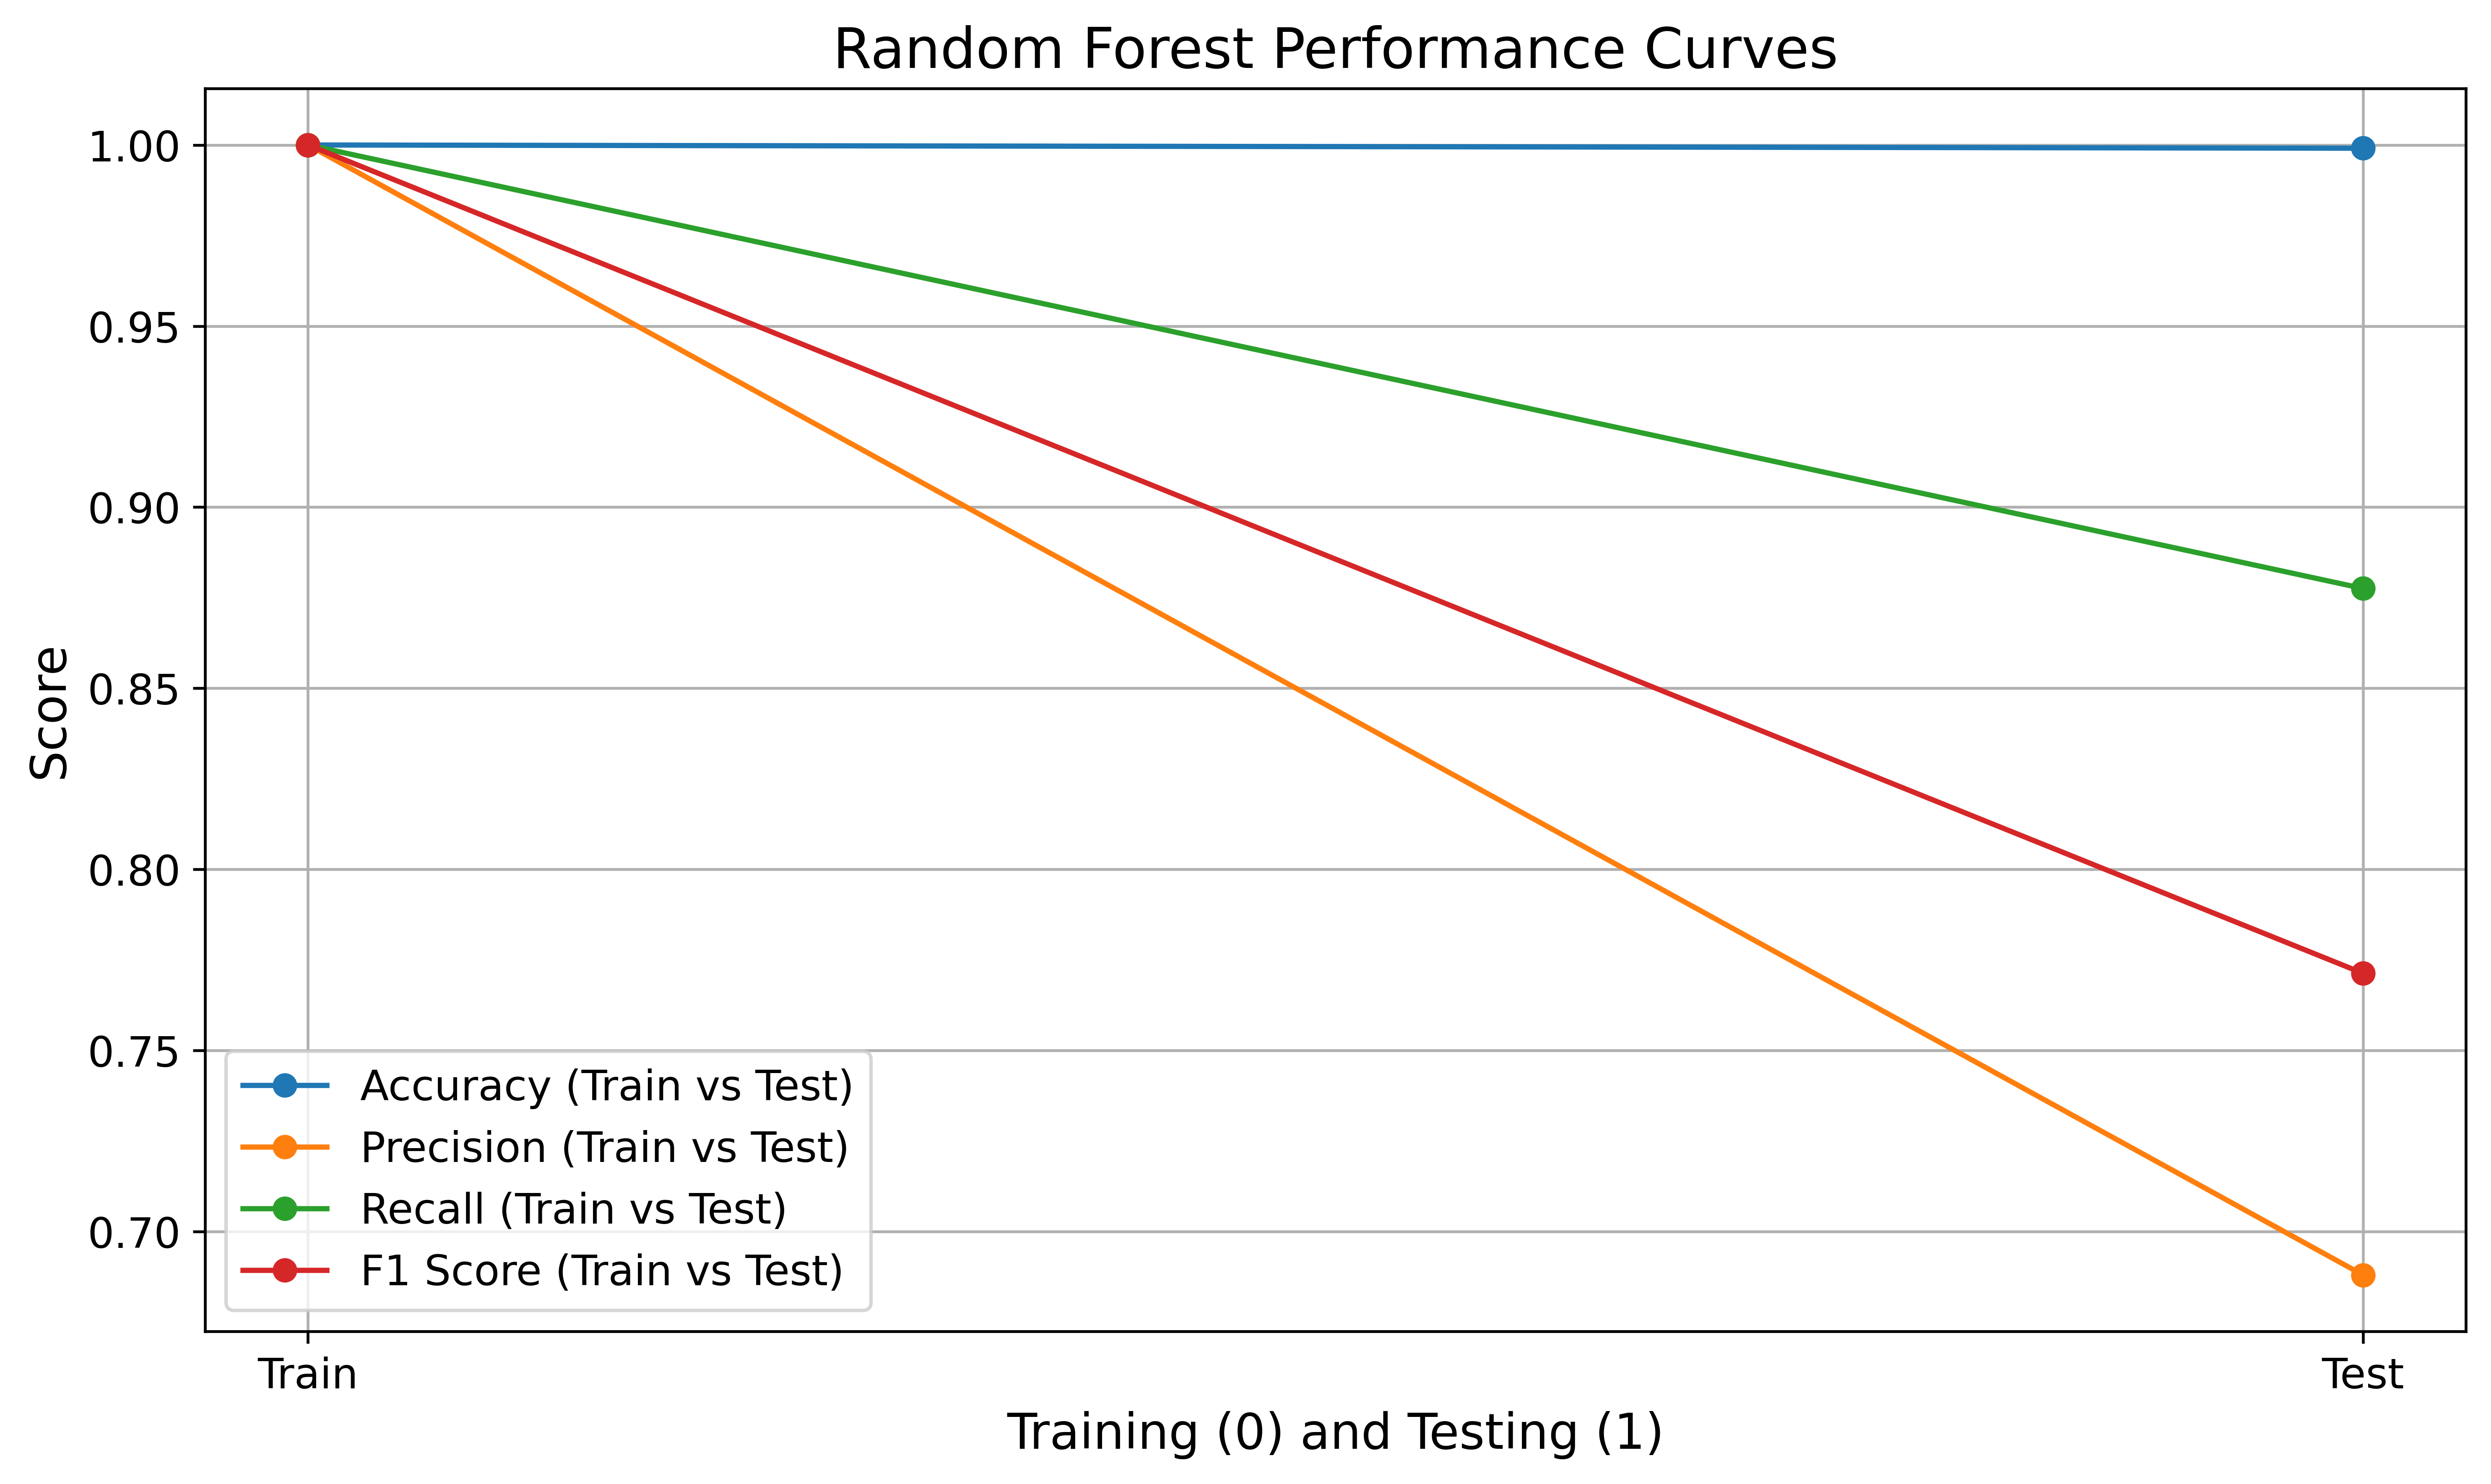

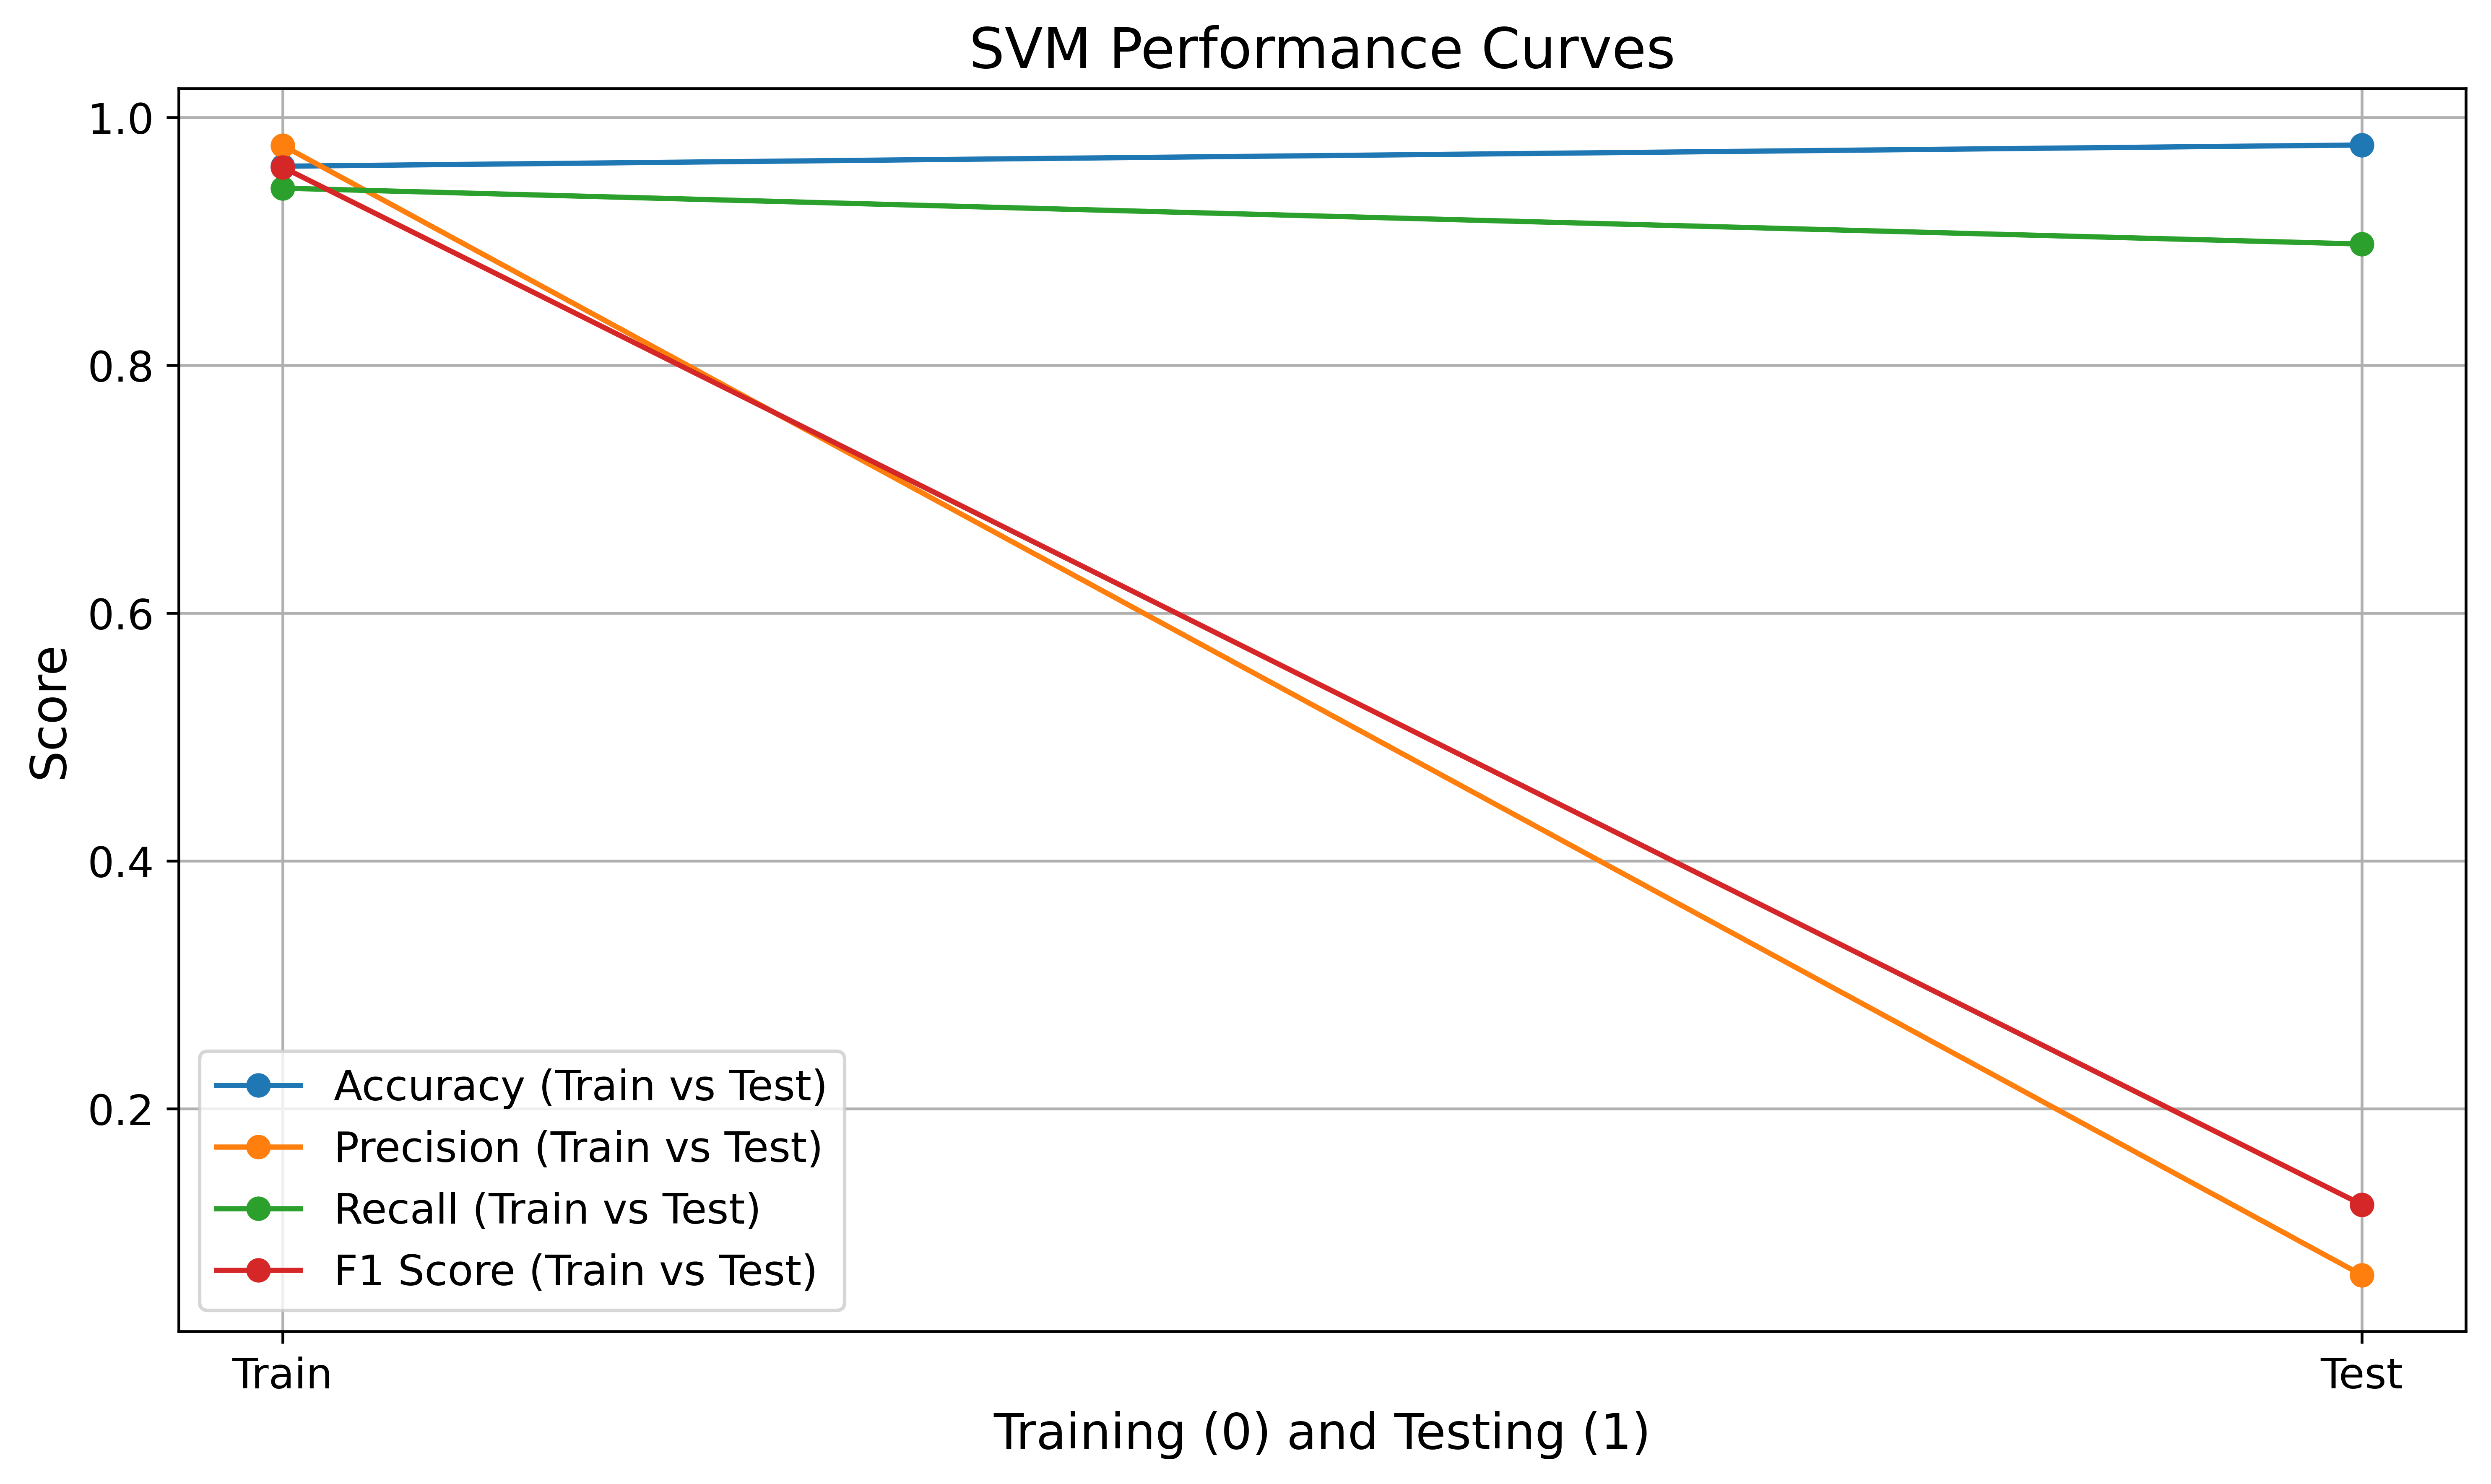

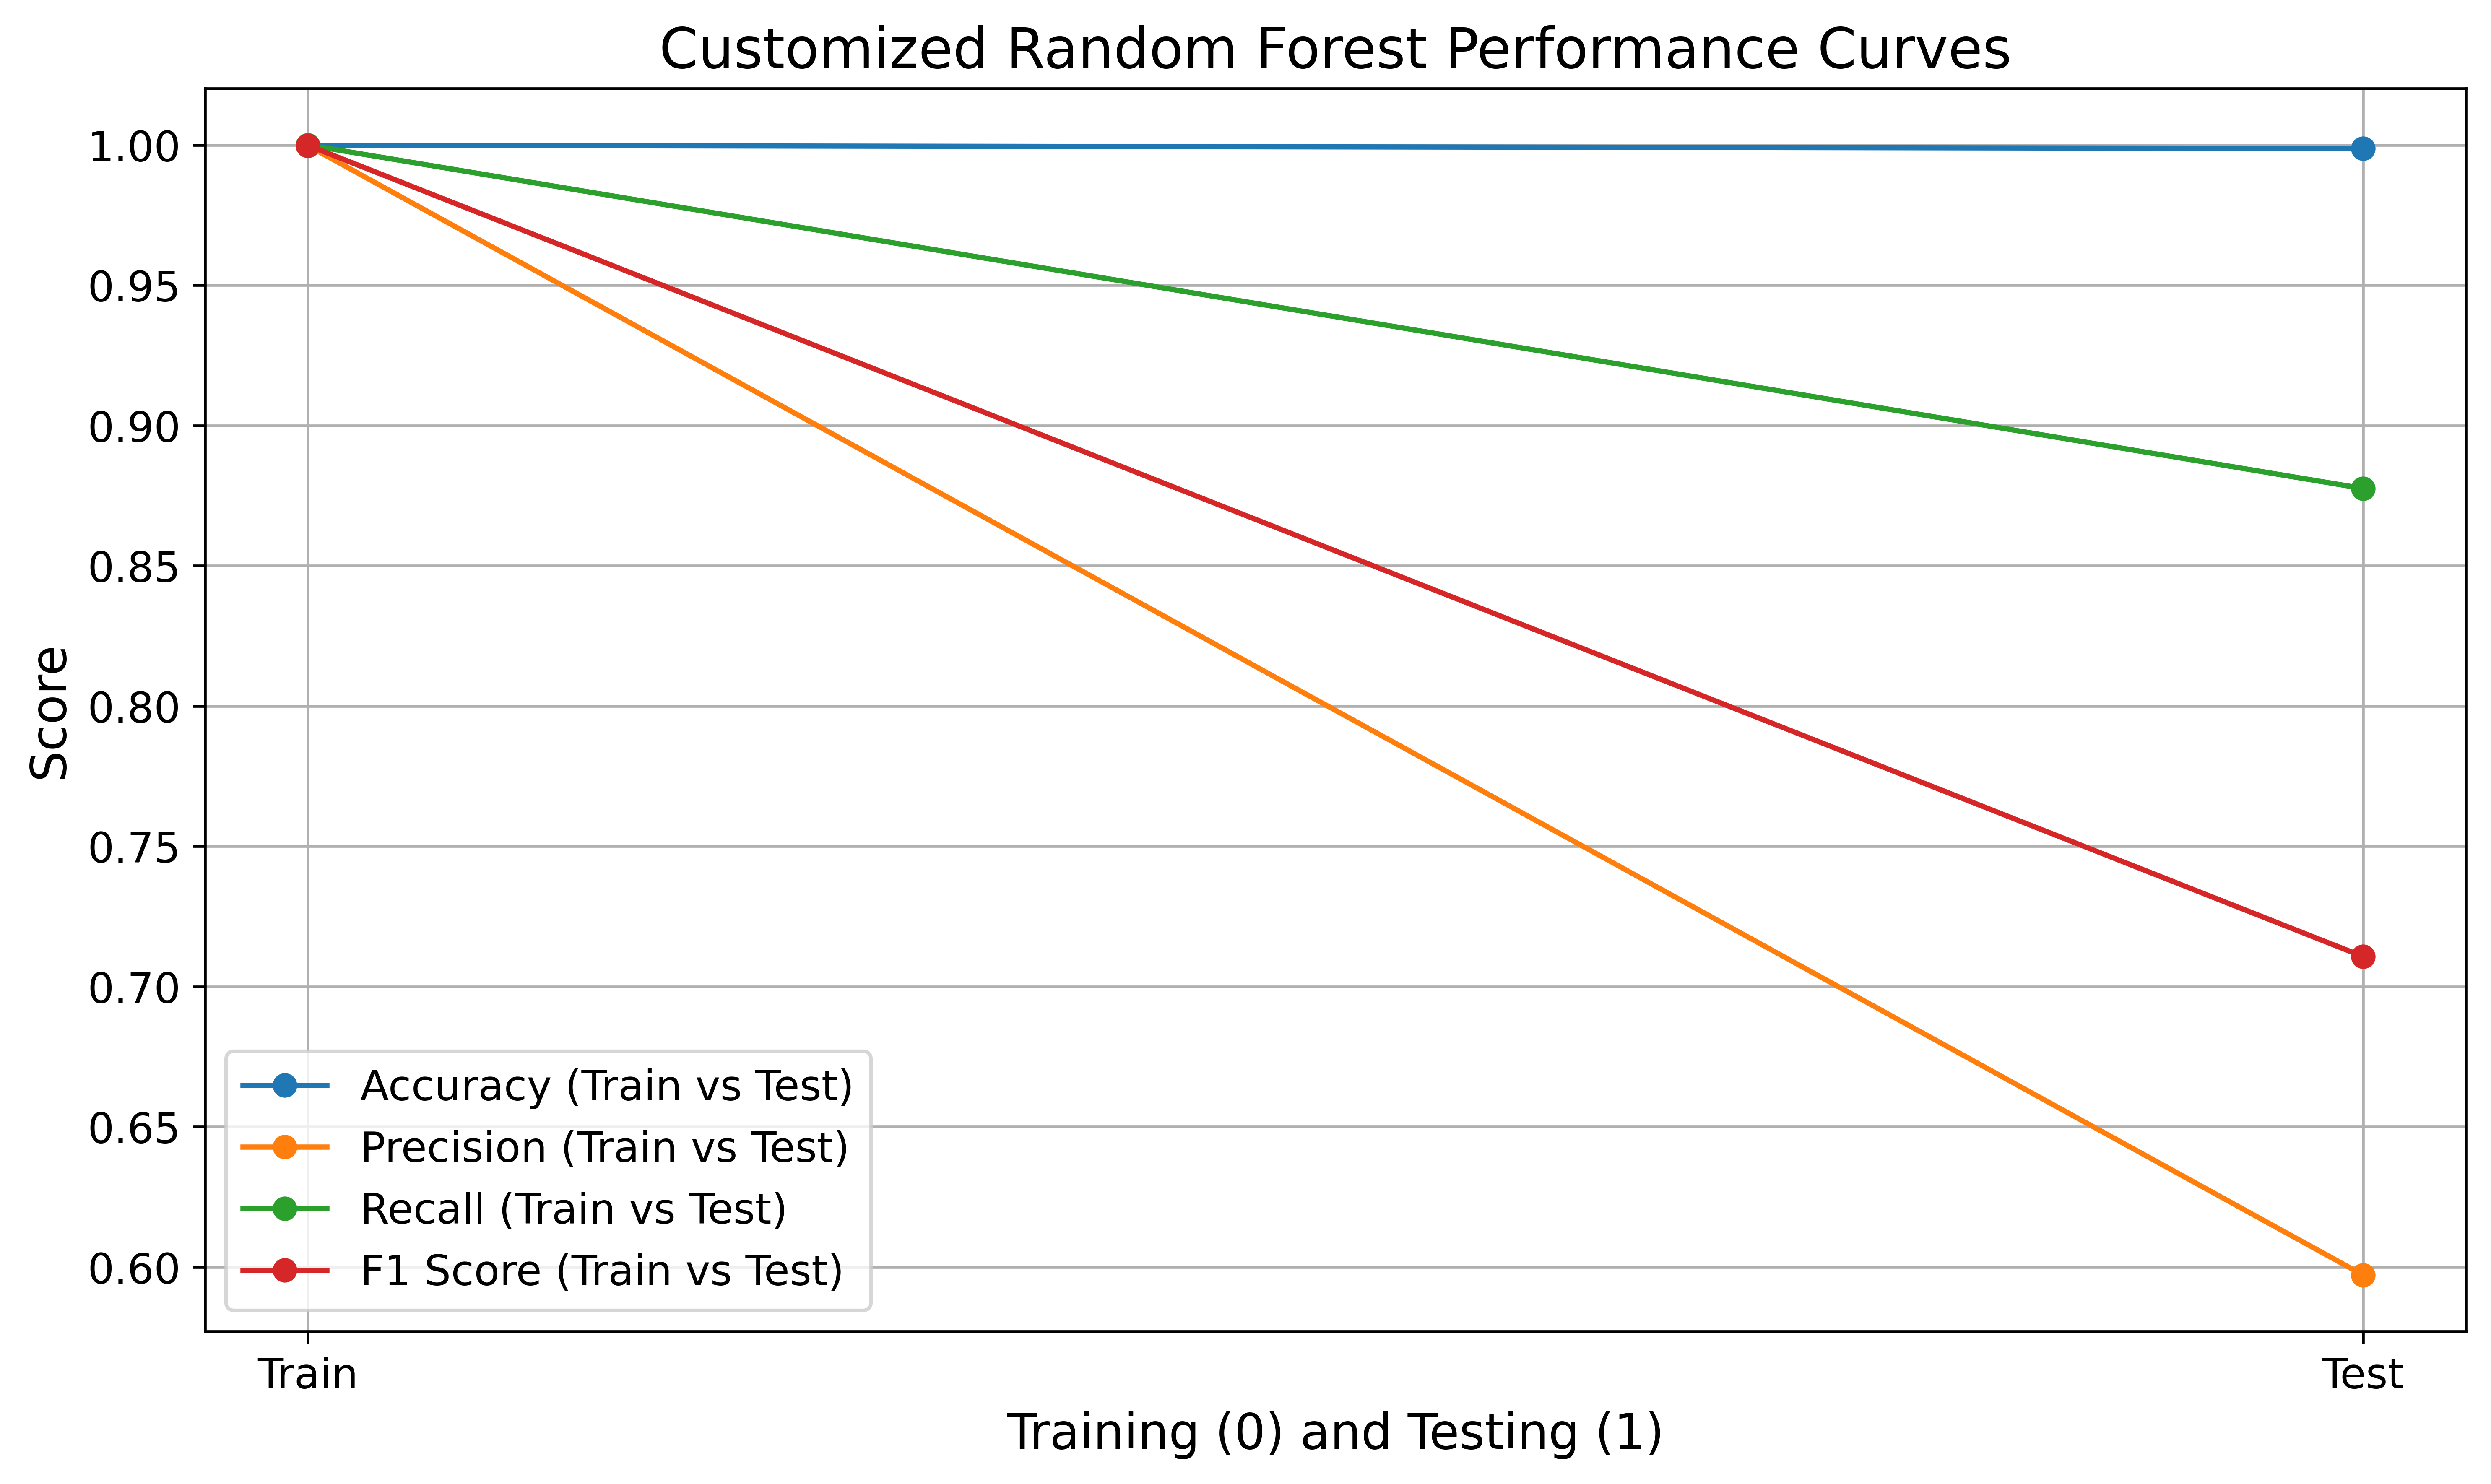

In [ ]:
# Step 9: Visualize Training and Testing Metrics for All Models

# Updated Function to plot metrics for a model
def plot_metrics_curve(model_name, train_metrics, test_metrics, metric_names):
    plt.figure(figsize=(10,6), dpi=600)

    # Each metric is already a list, so we plot the training vs testing metrics
    for i, metric_name in enumerate(metric_names):
        # Plot each metric with corresponding train and test values
        plt.plot([0, 1], [train_metrics[i], test_metrics[i]], label=f'{metric_name} (Train vs Test)', marker='o')

    plt.title(f'{model_name} Performance Curves', fontsize=16)
    plt.xlabel('Training (0) and Testing (1)', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks([0, 1], ['Train', 'Test'], fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

# List of metrics names to use
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot curves for each model (Training and Testing Metrics)
plot_metrics_curve("Decision Tree", train_metrics_list[0], test_metrics_list[0], metric_names)
plot_metrics_curve("Random Forest", train_metrics_list[1], test_metrics_list[1], metric_names)
plot_metrics_curve("SVM", train_metrics_list[2], test_metrics_list[2], metric_names)
plot_metrics_curve("Customized Random Forest", train_metrics_list[3], test_metrics_list[3], metric_names)


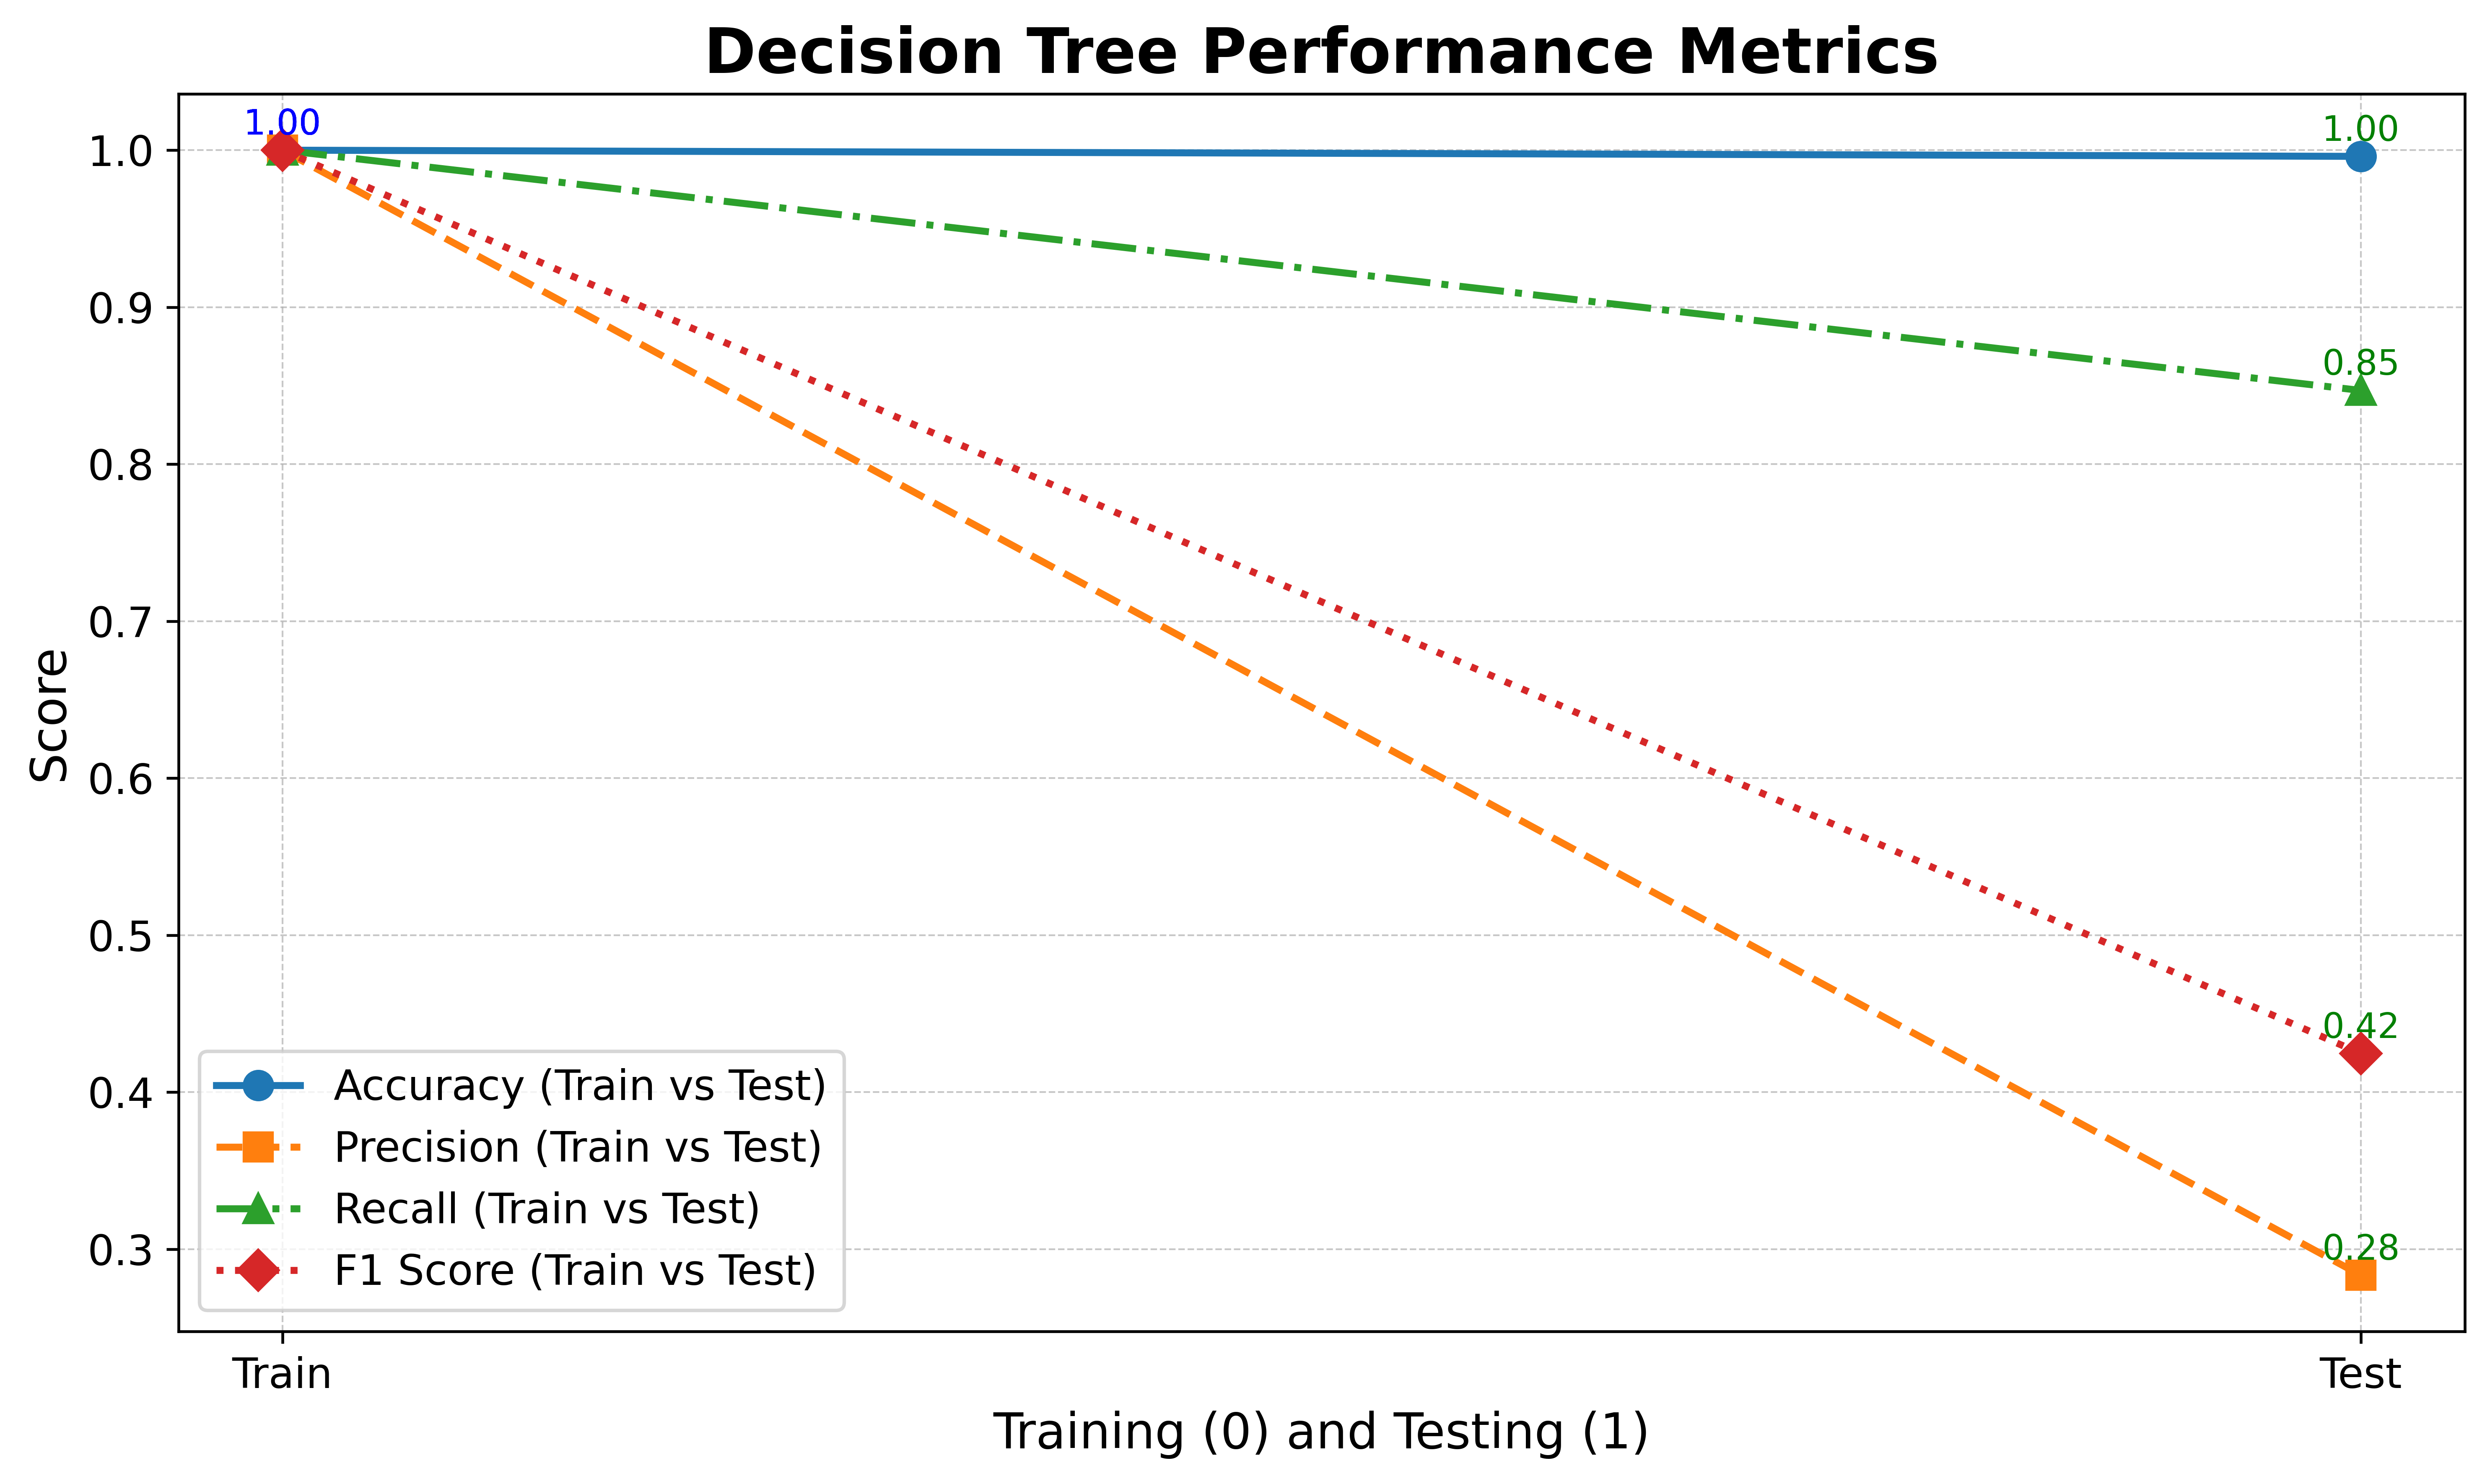

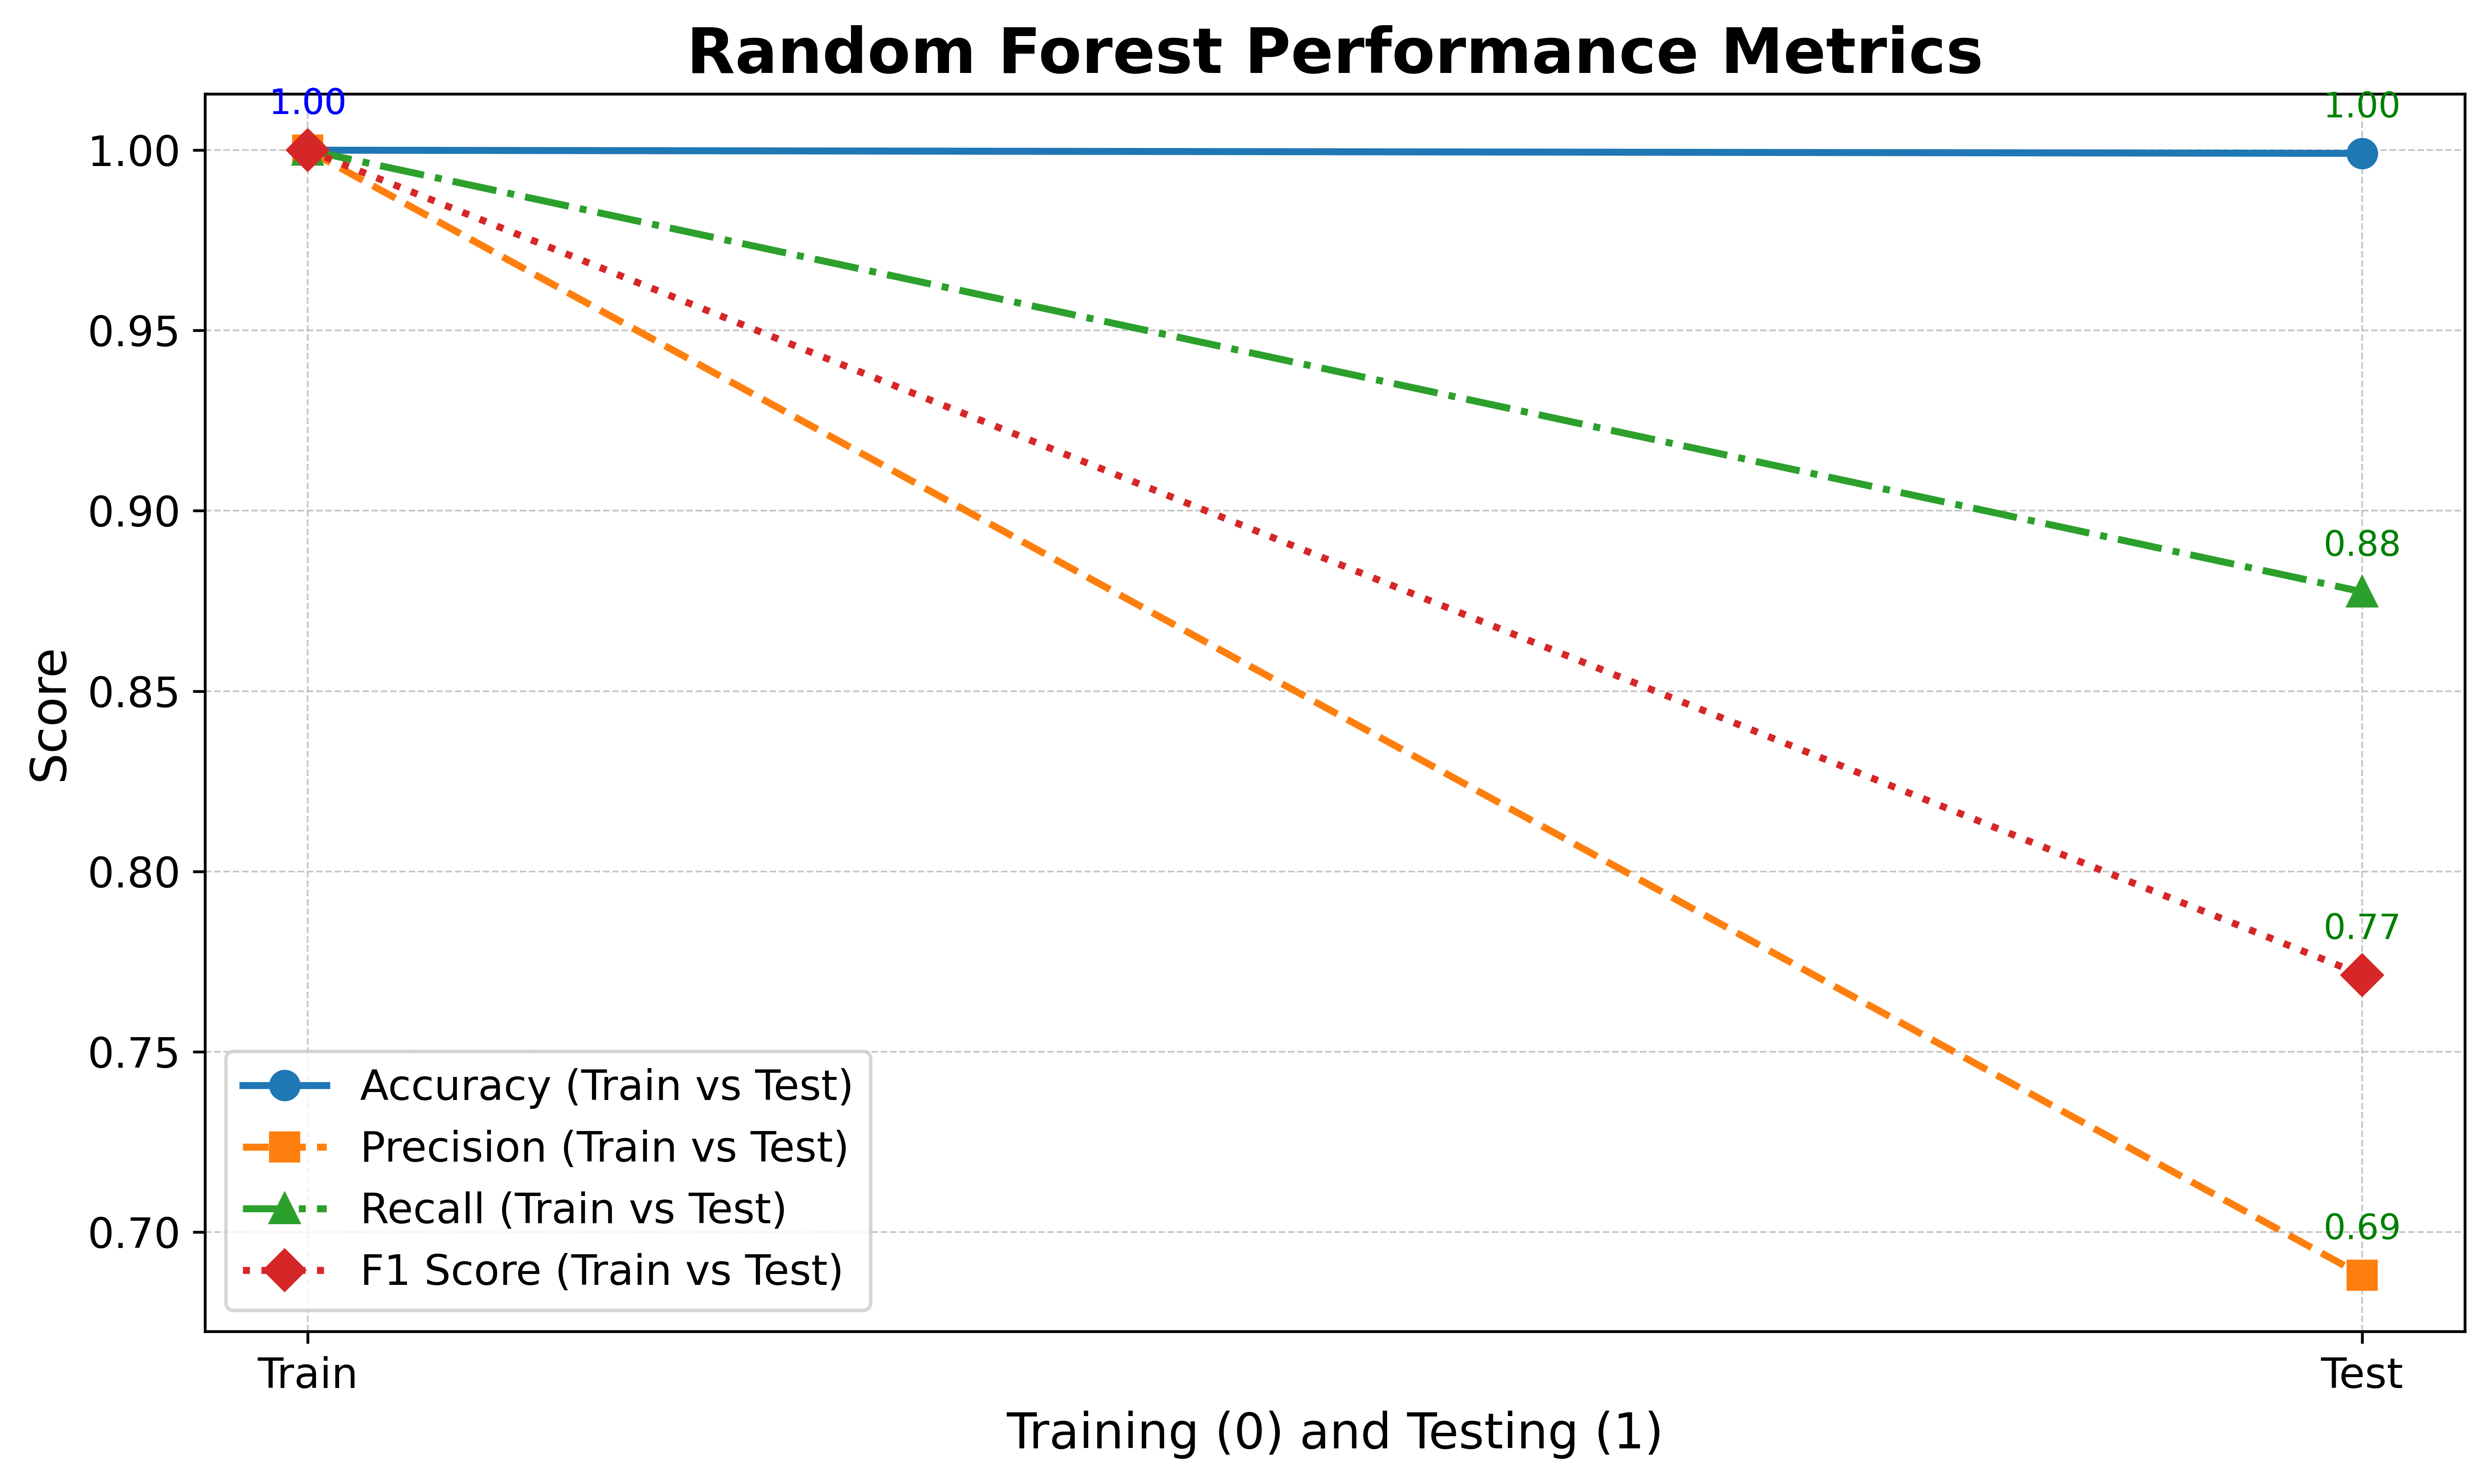

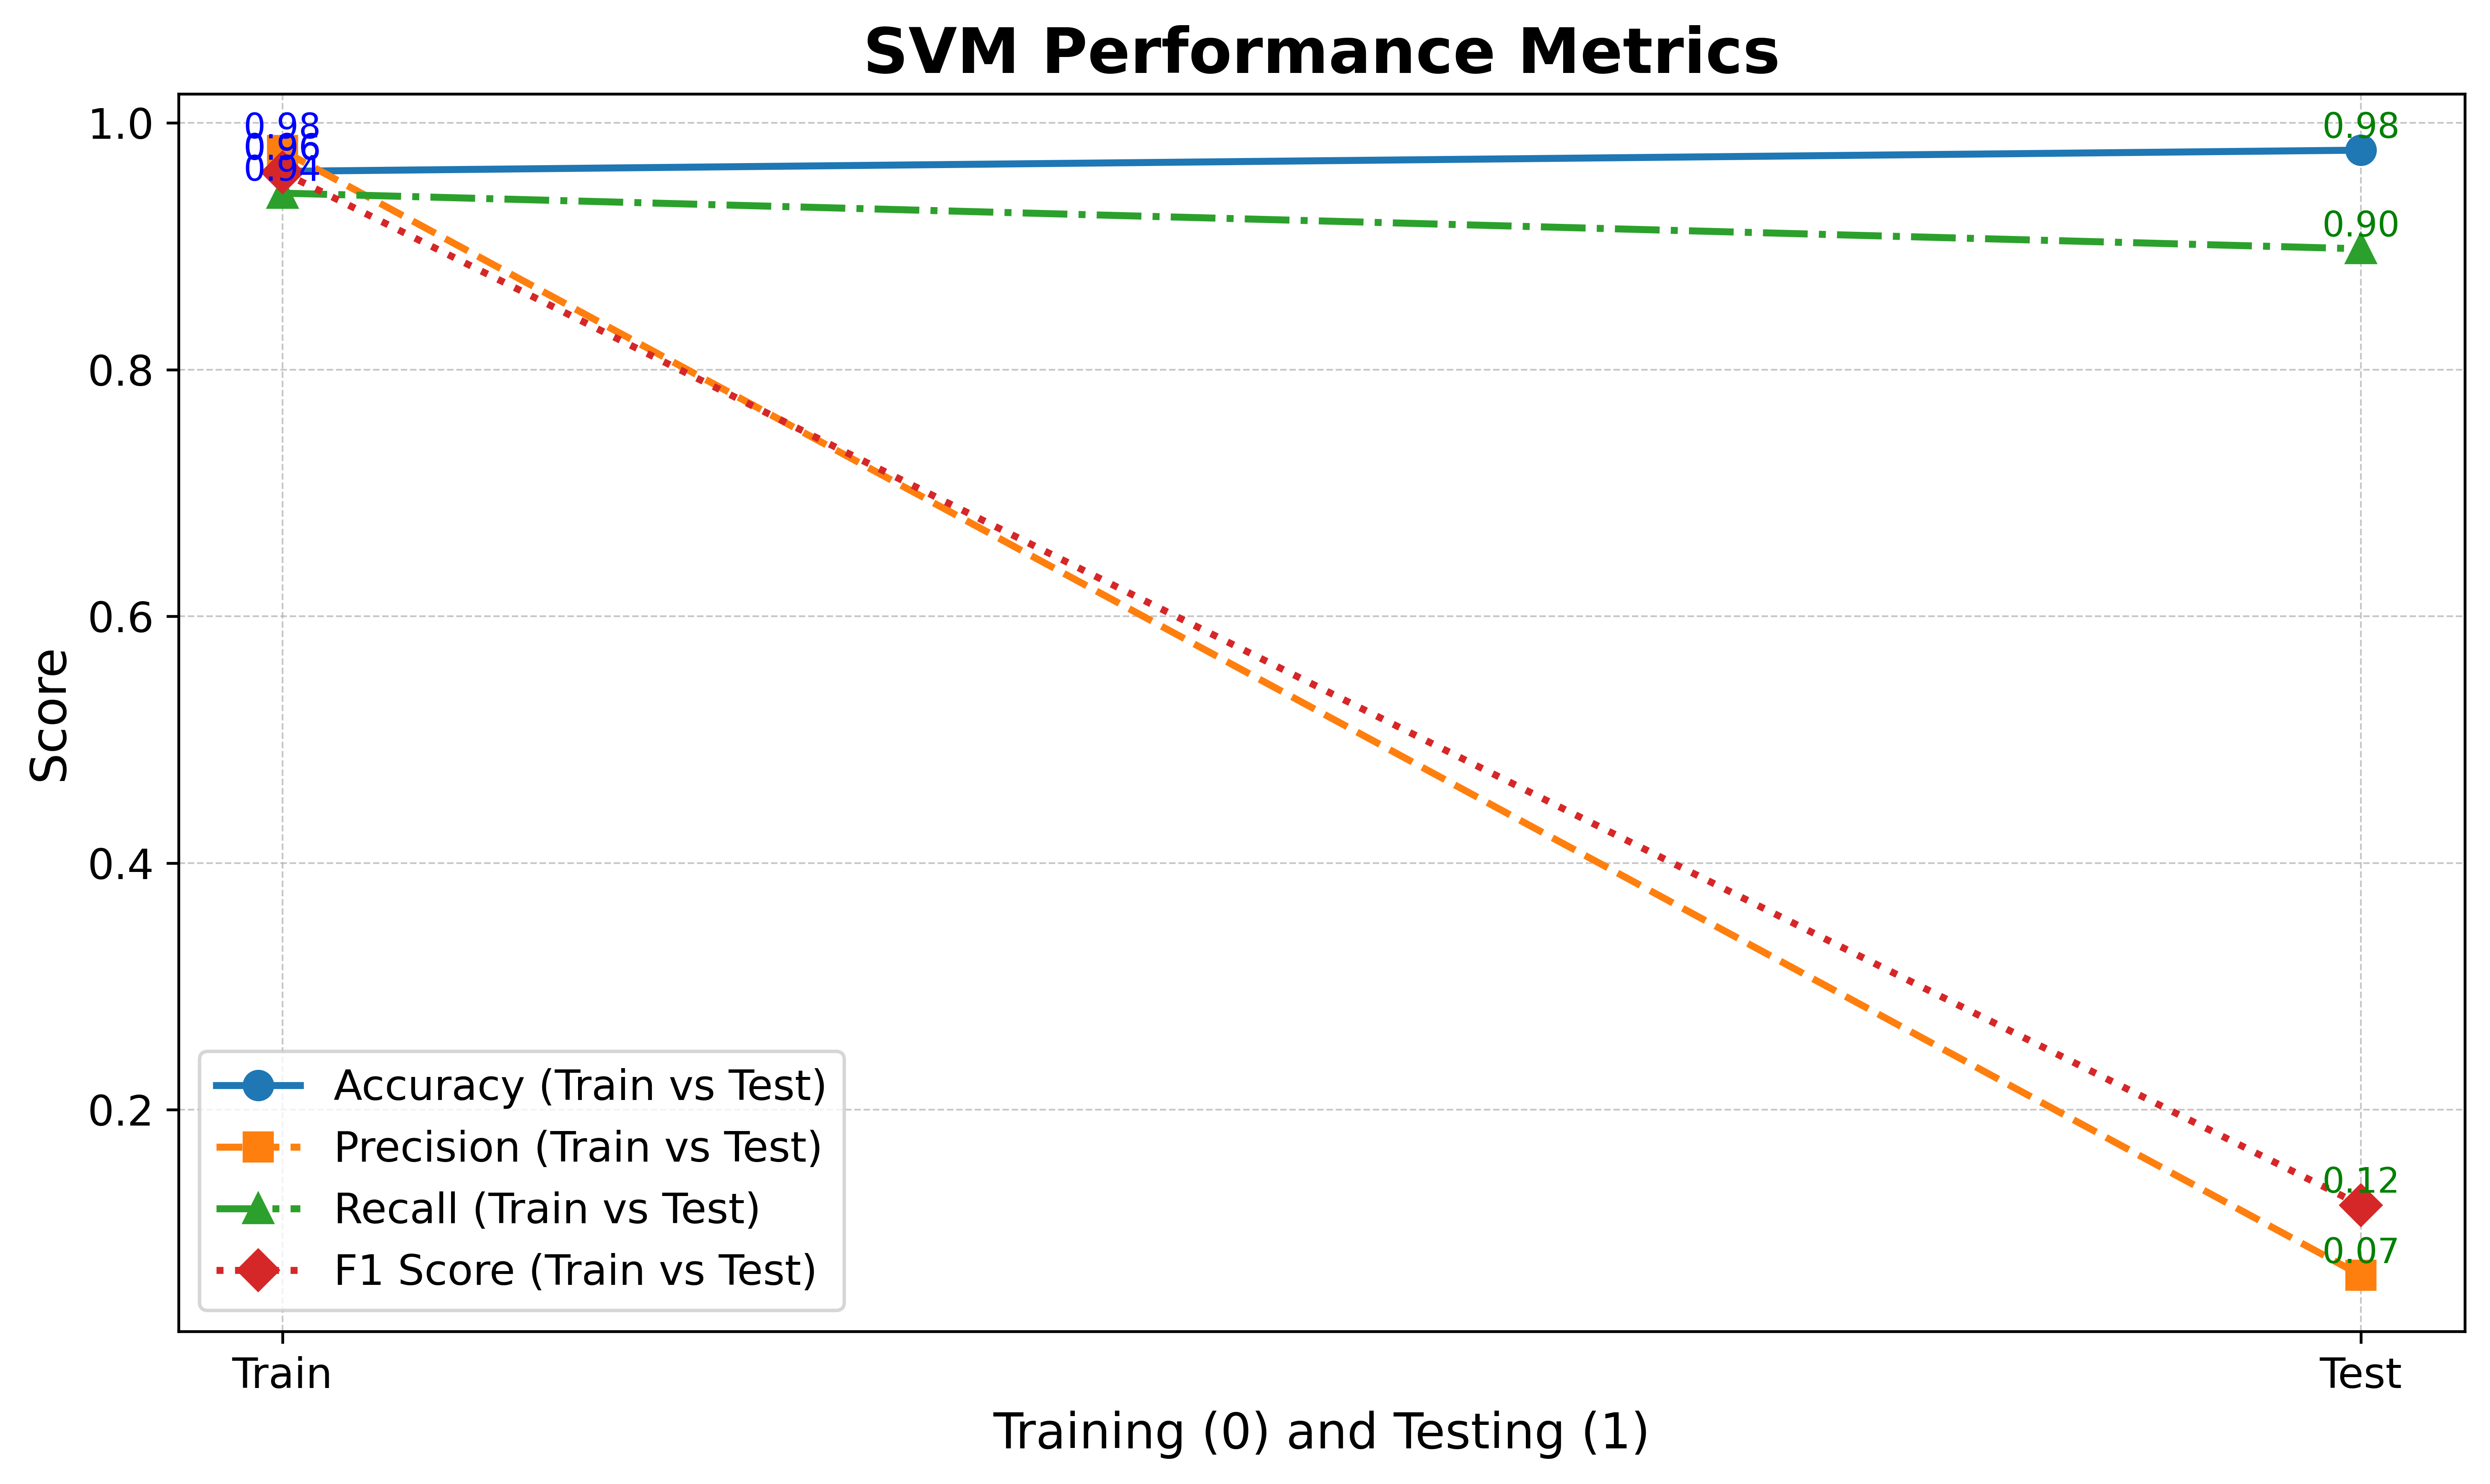

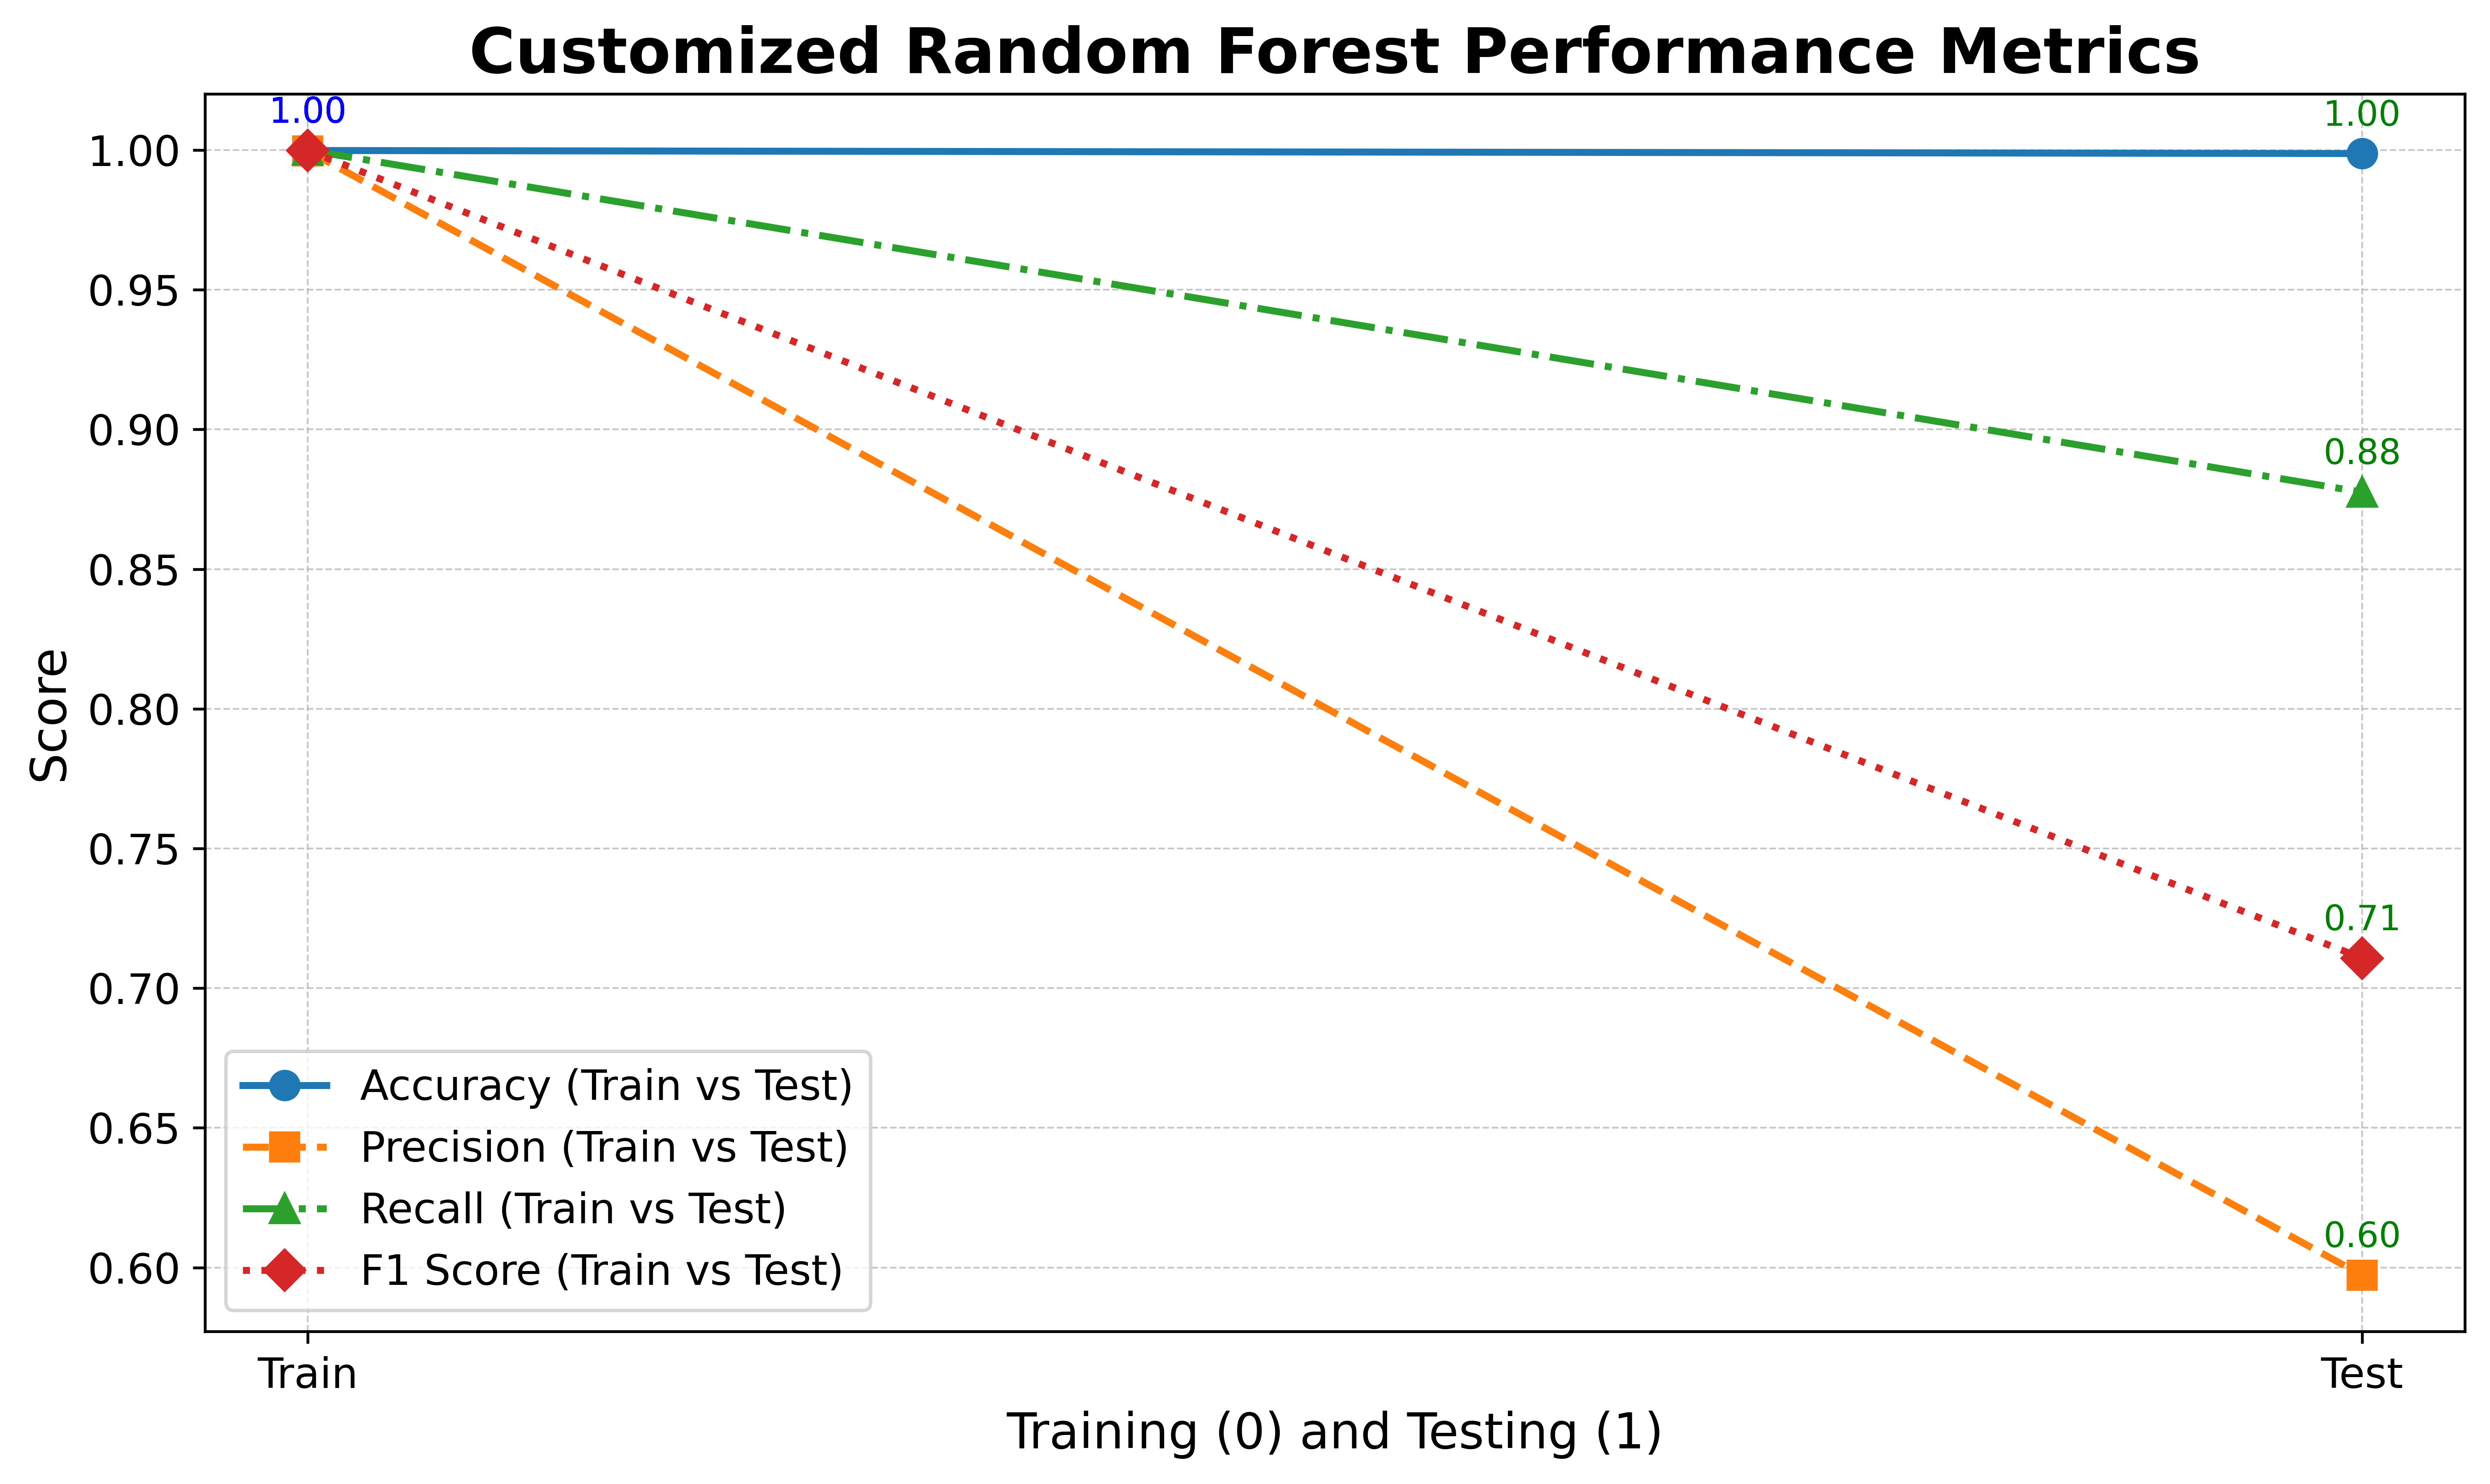

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated Function to plot metrics with better curve plots
def plot_metrics_curve(model_name, train_metrics, test_metrics, metric_names):
    plt.figure(figsize=(10, 6), dpi=600)

    x_ticks = np.array([0, 1])  # Representing 'Train' as 0 and 'Test' as 1

    # Different line styles and markers for training and testing metrics
    line_styles = ['-', '--', '-.', ':']  # Different styles for metrics
    markers = ['o', 's', '^', 'D']  # Different markers for each metric

    # Loop through each metric and plot
    for i, metric_name in enumerate(metric_names):
        plt.plot(
            x_ticks,
            [train_metrics[i], test_metrics[i]],
            label=f'{metric_name} (Train vs Test)',
            linestyle=line_styles[i % len(line_styles)],  # Cycle through line styles
            marker=markers[i % len(markers)],  # Cycle through markers
            markersize=8,
            linewidth=2
        )

        # Annotate exact values
        plt.text(0, train_metrics[i] + 0.01, f'{train_metrics[i]:.2f}', ha='center', fontsize=10, color='blue')
        plt.text(1, test_metrics[i] + 0.01, f'{test_metrics[i]:.2f}', ha='center', fontsize=10, color='green')

    # Enhance plot aesthetics
    plt.title(f'{model_name} Performance Metrics', fontsize=18, weight='bold')
    plt.xlabel('Training (0) and Testing (1)', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks([0, 1], ['Train', 'Test'], fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Add legend with best location
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

# List of metrics names to use
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot curves for each model (Training and Testing Metrics)
plot_metrics_curve("Decision Tree", train_metrics_list[0], test_metrics_list[0], metric_names)
plot_metrics_curve("Random Forest", train_metrics_list[1], test_metrics_list[1], metric_names)
plot_metrics_curve("SVM", train_metrics_list[2], test_metrics_list[2], metric_names)
plot_metrics_curve("Customized Random Forest", train_metrics_list[3], test_metrics_list[3], metric_names)


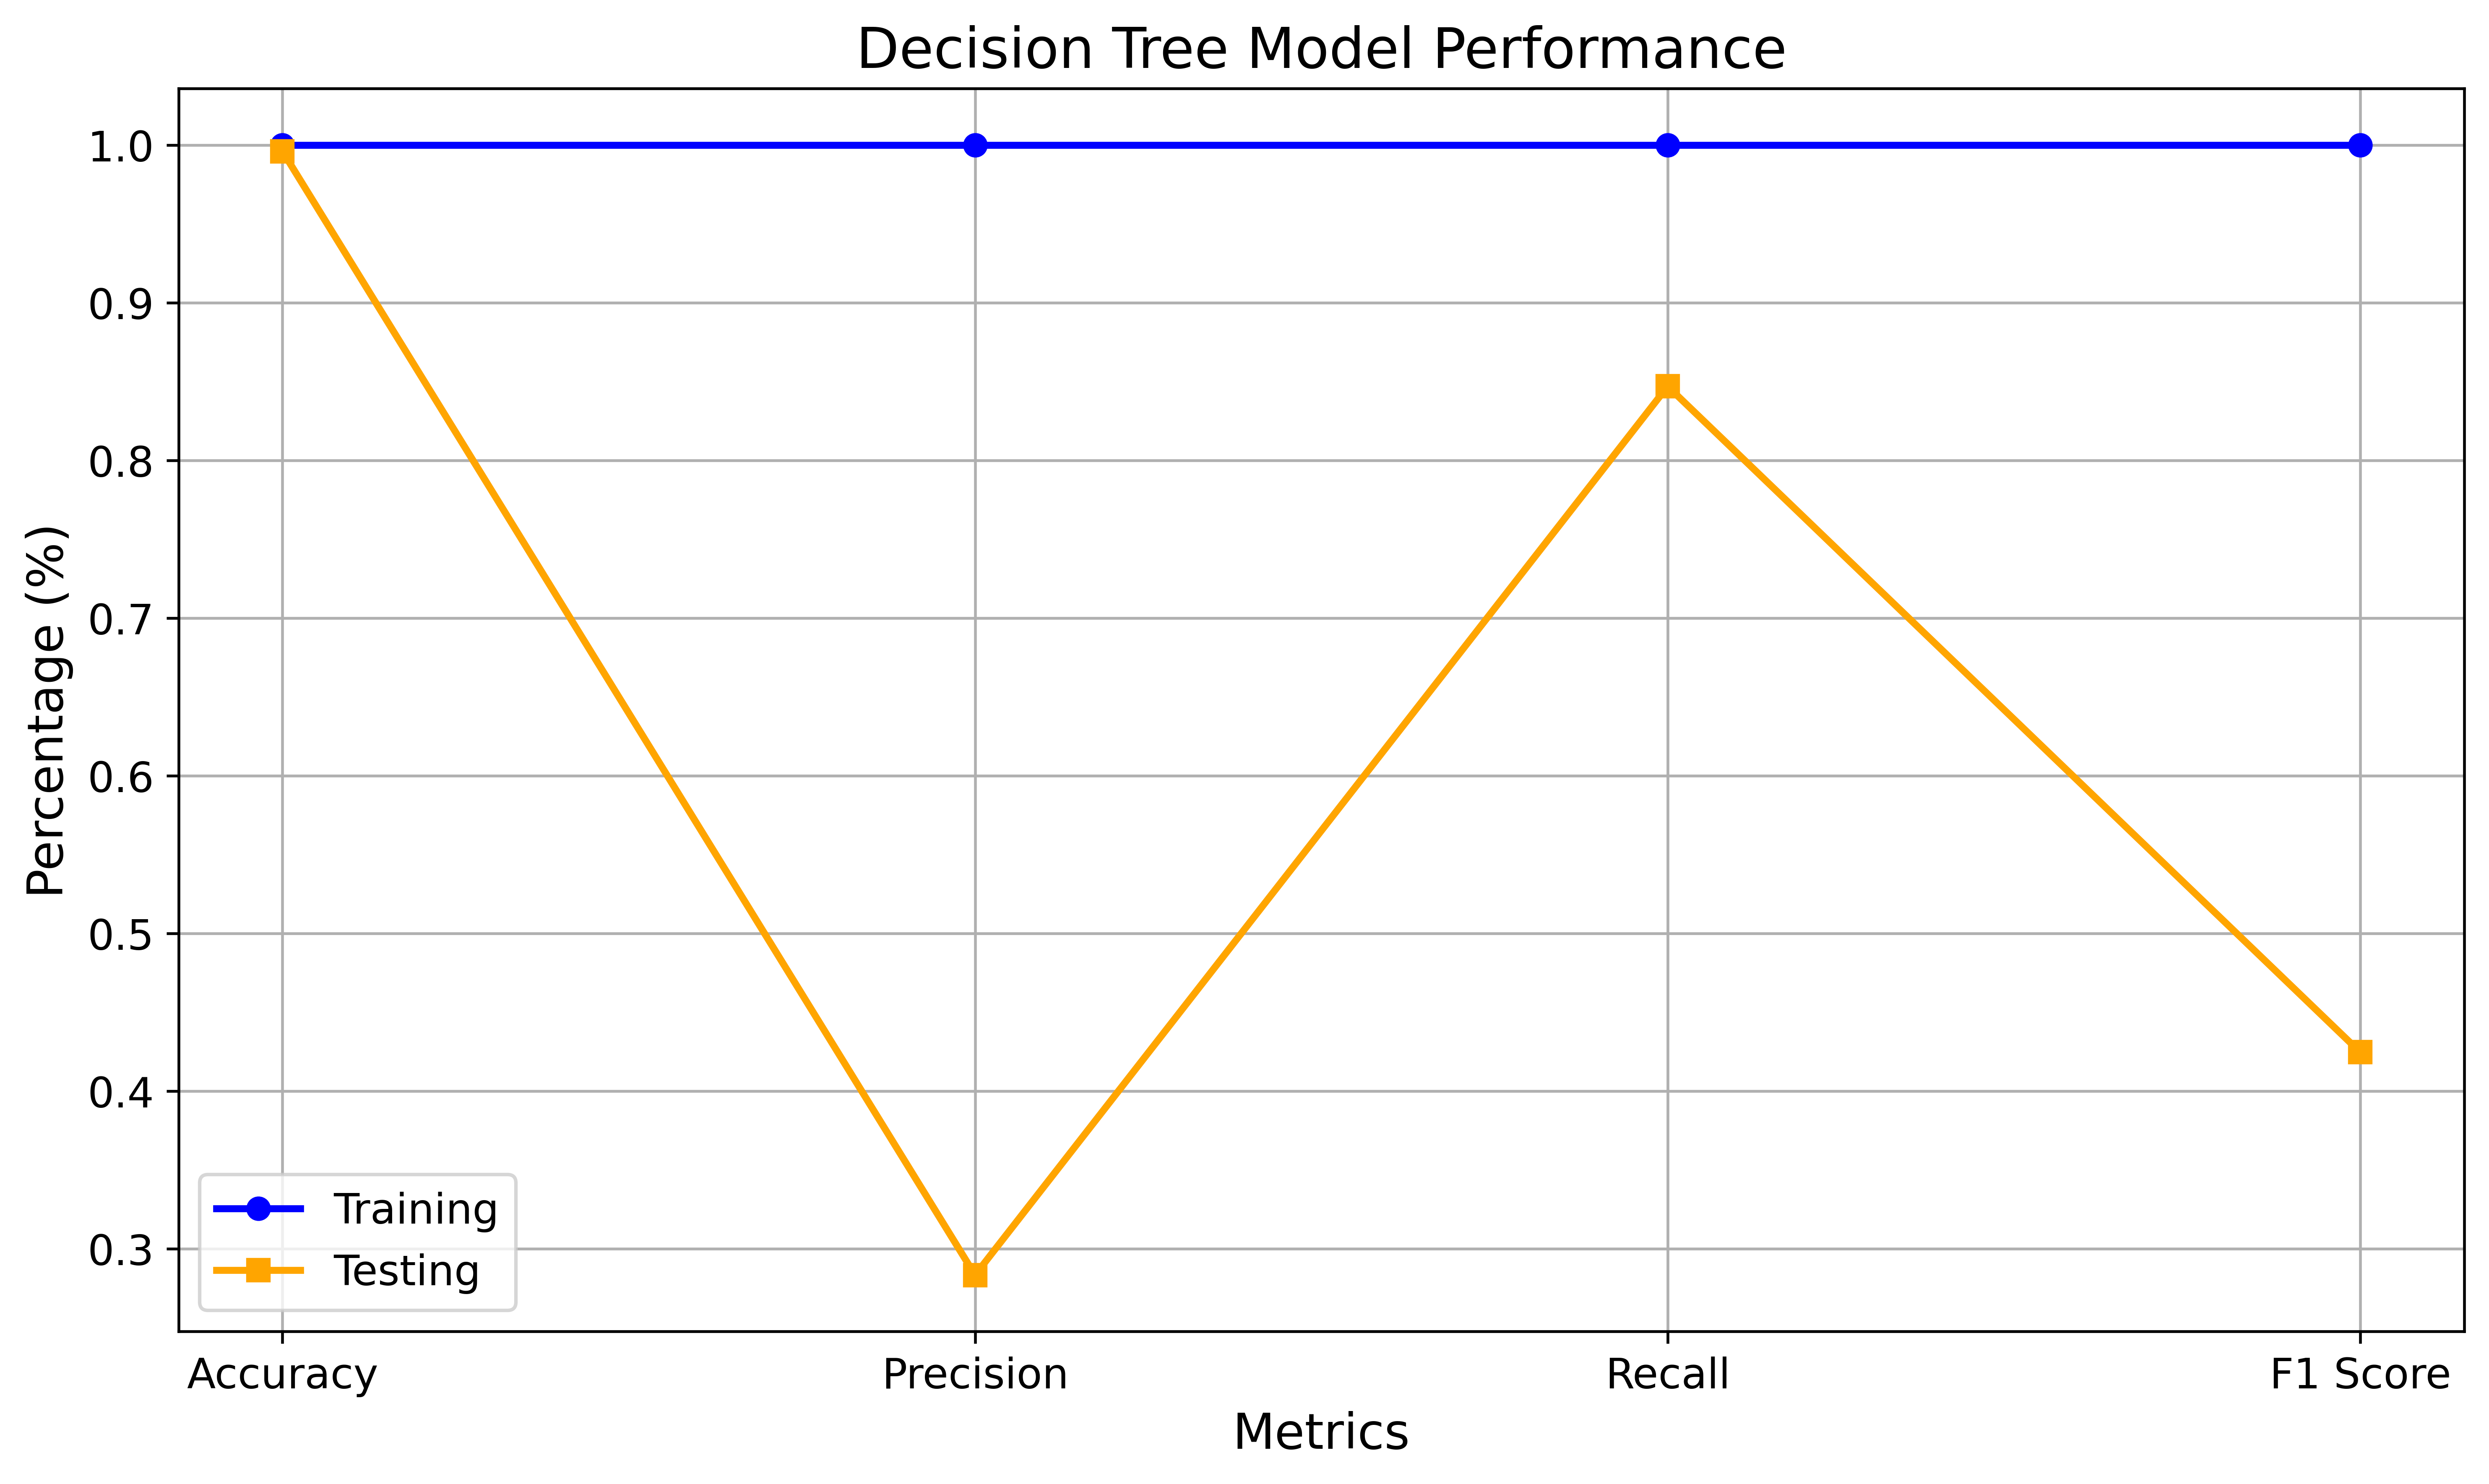

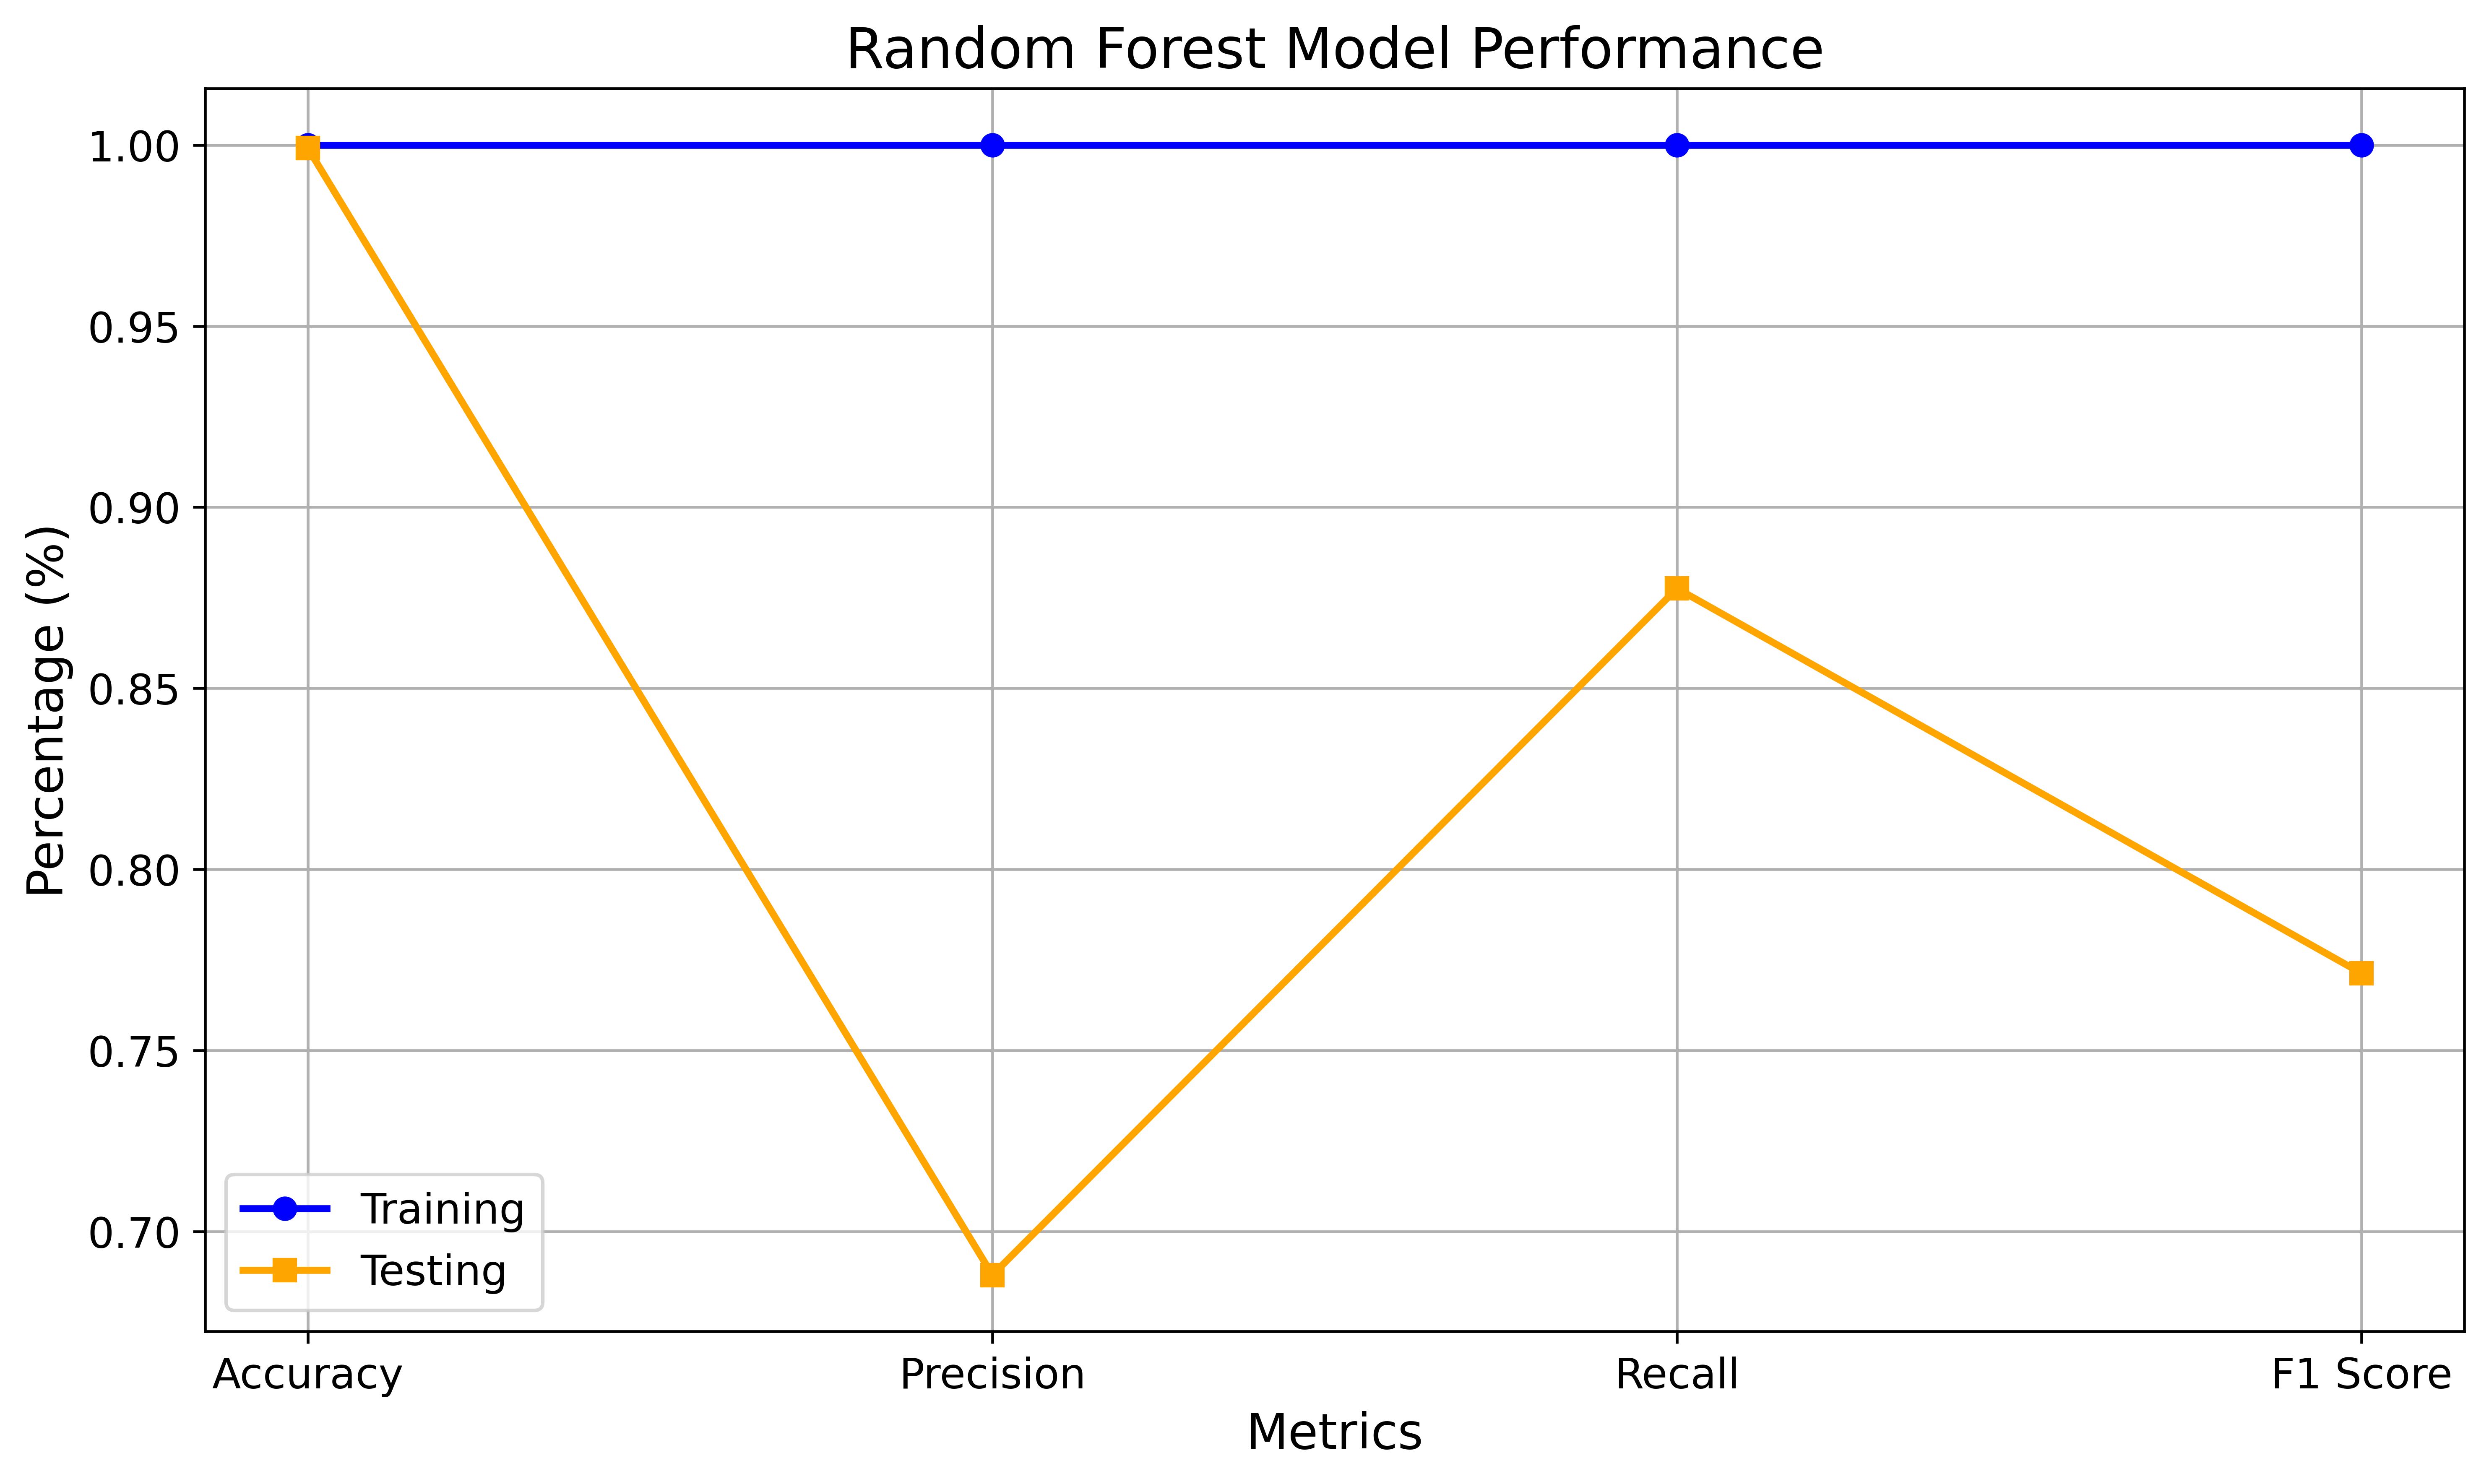

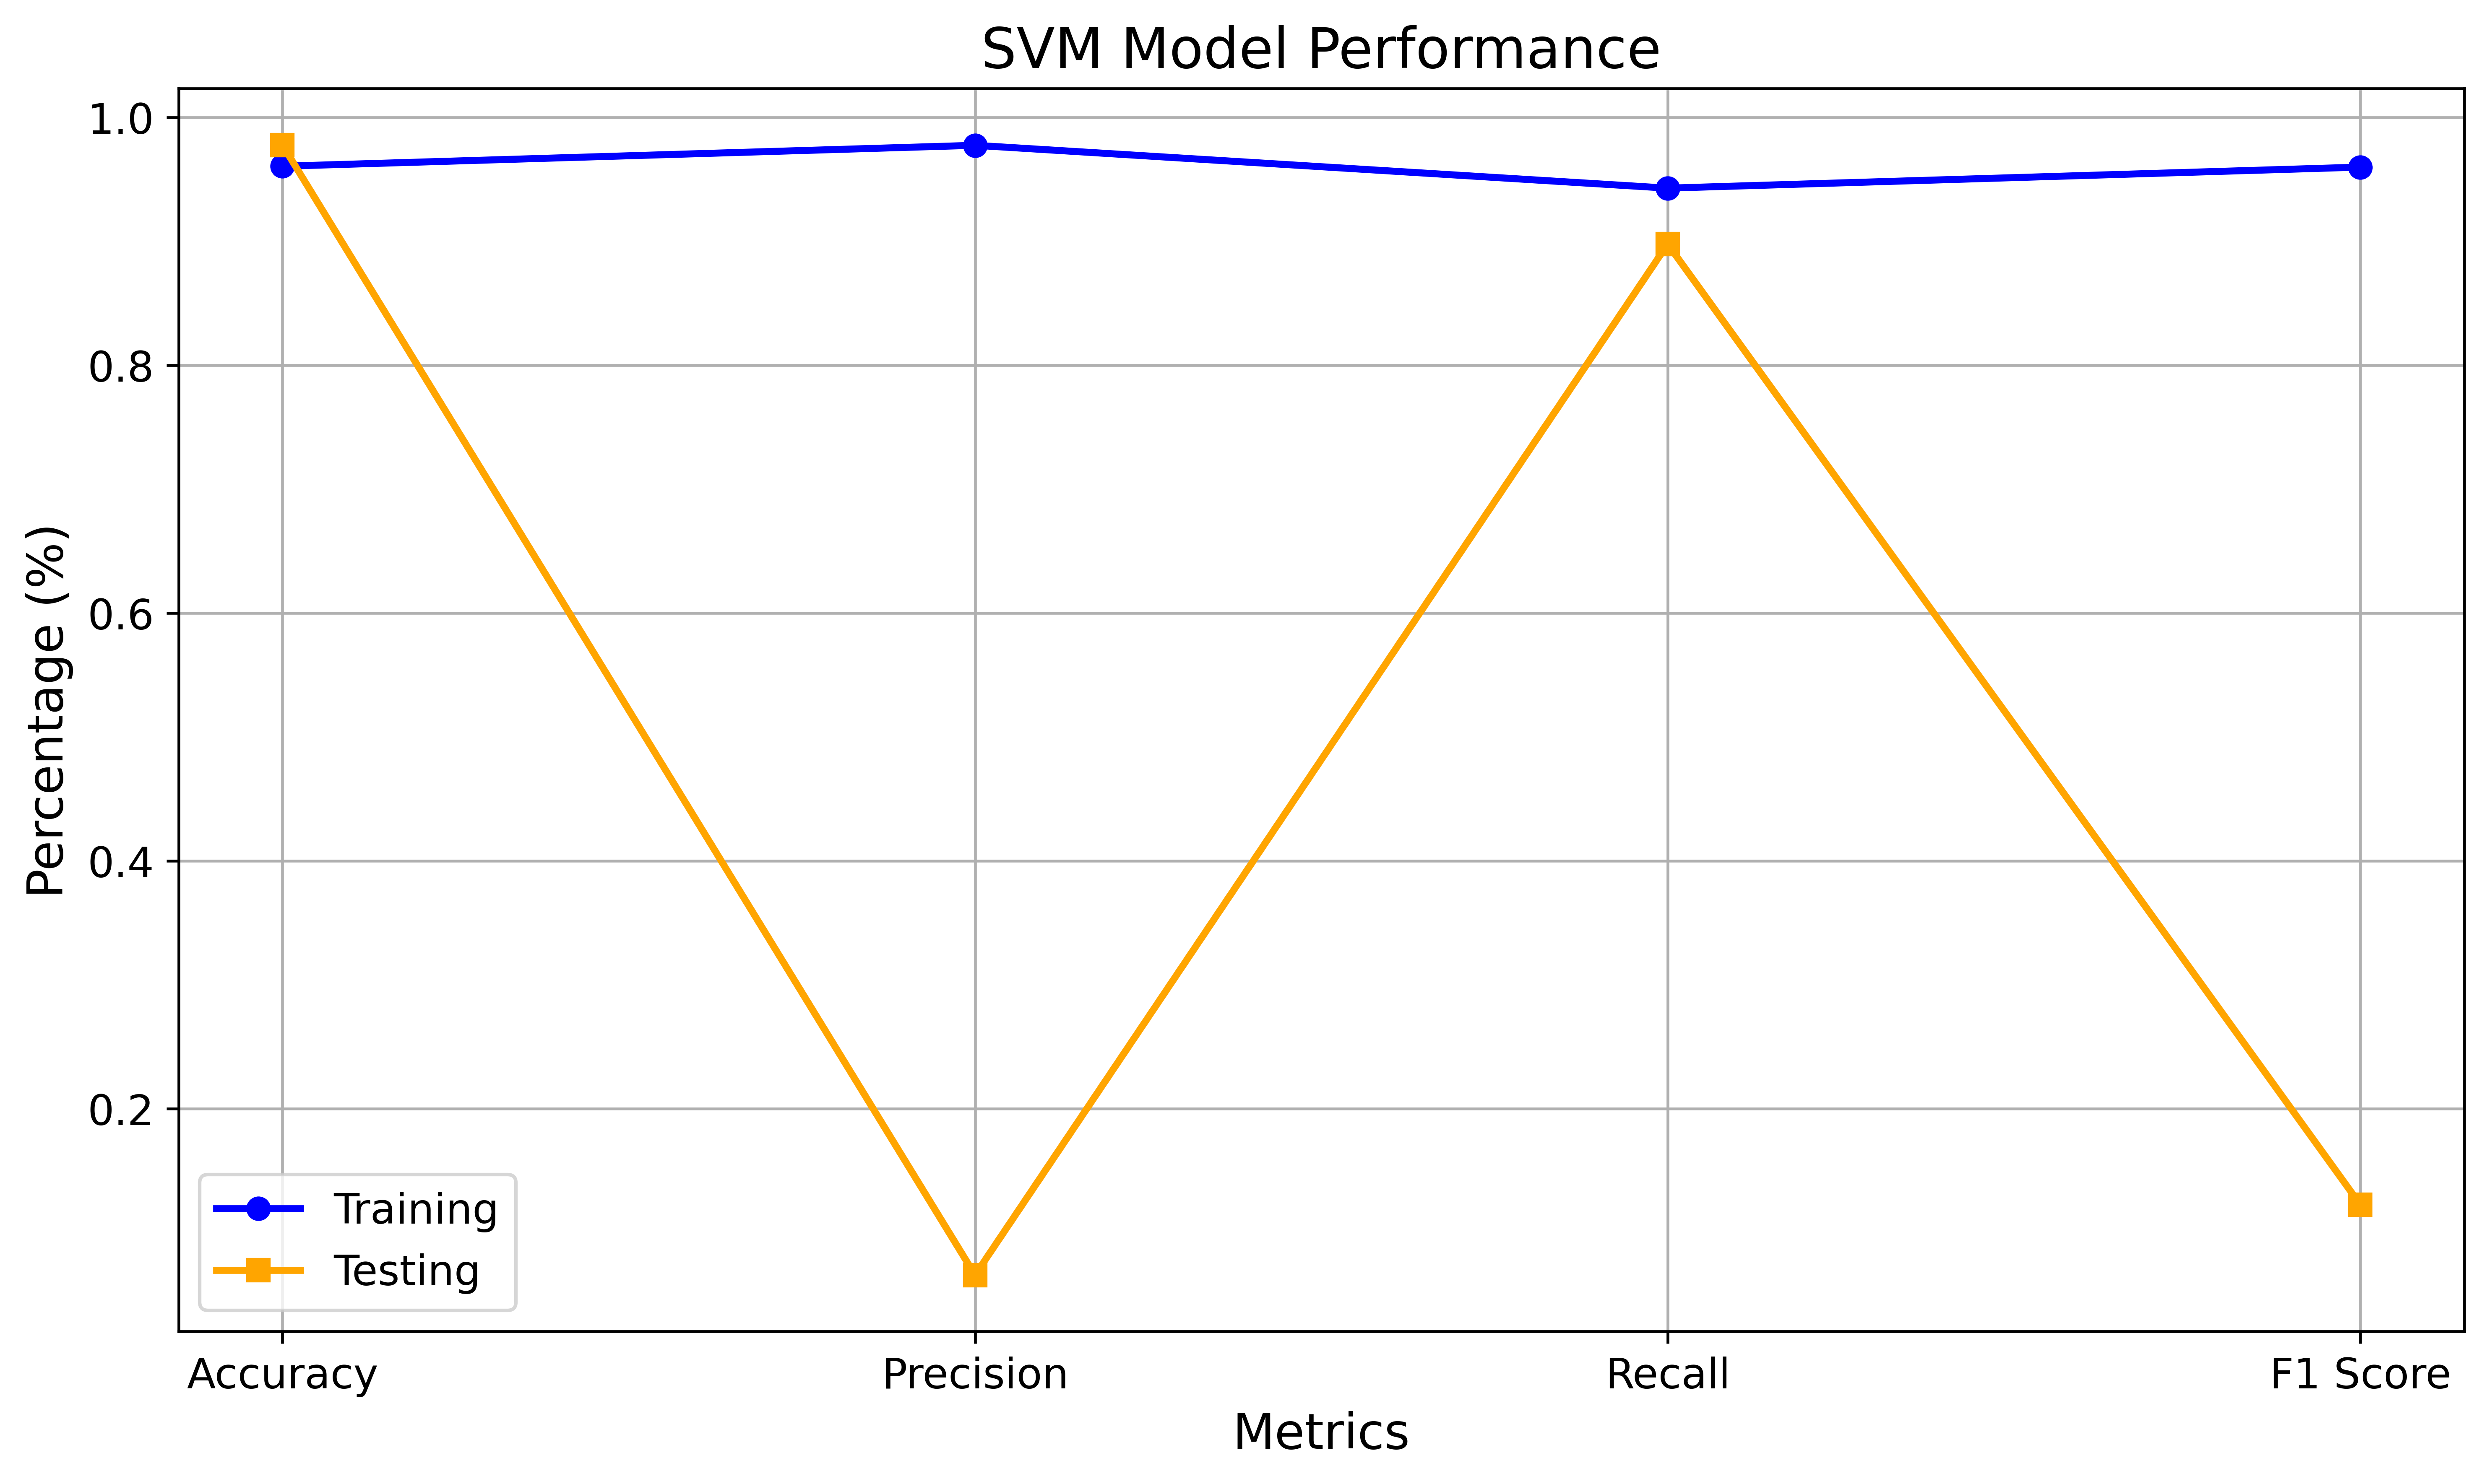

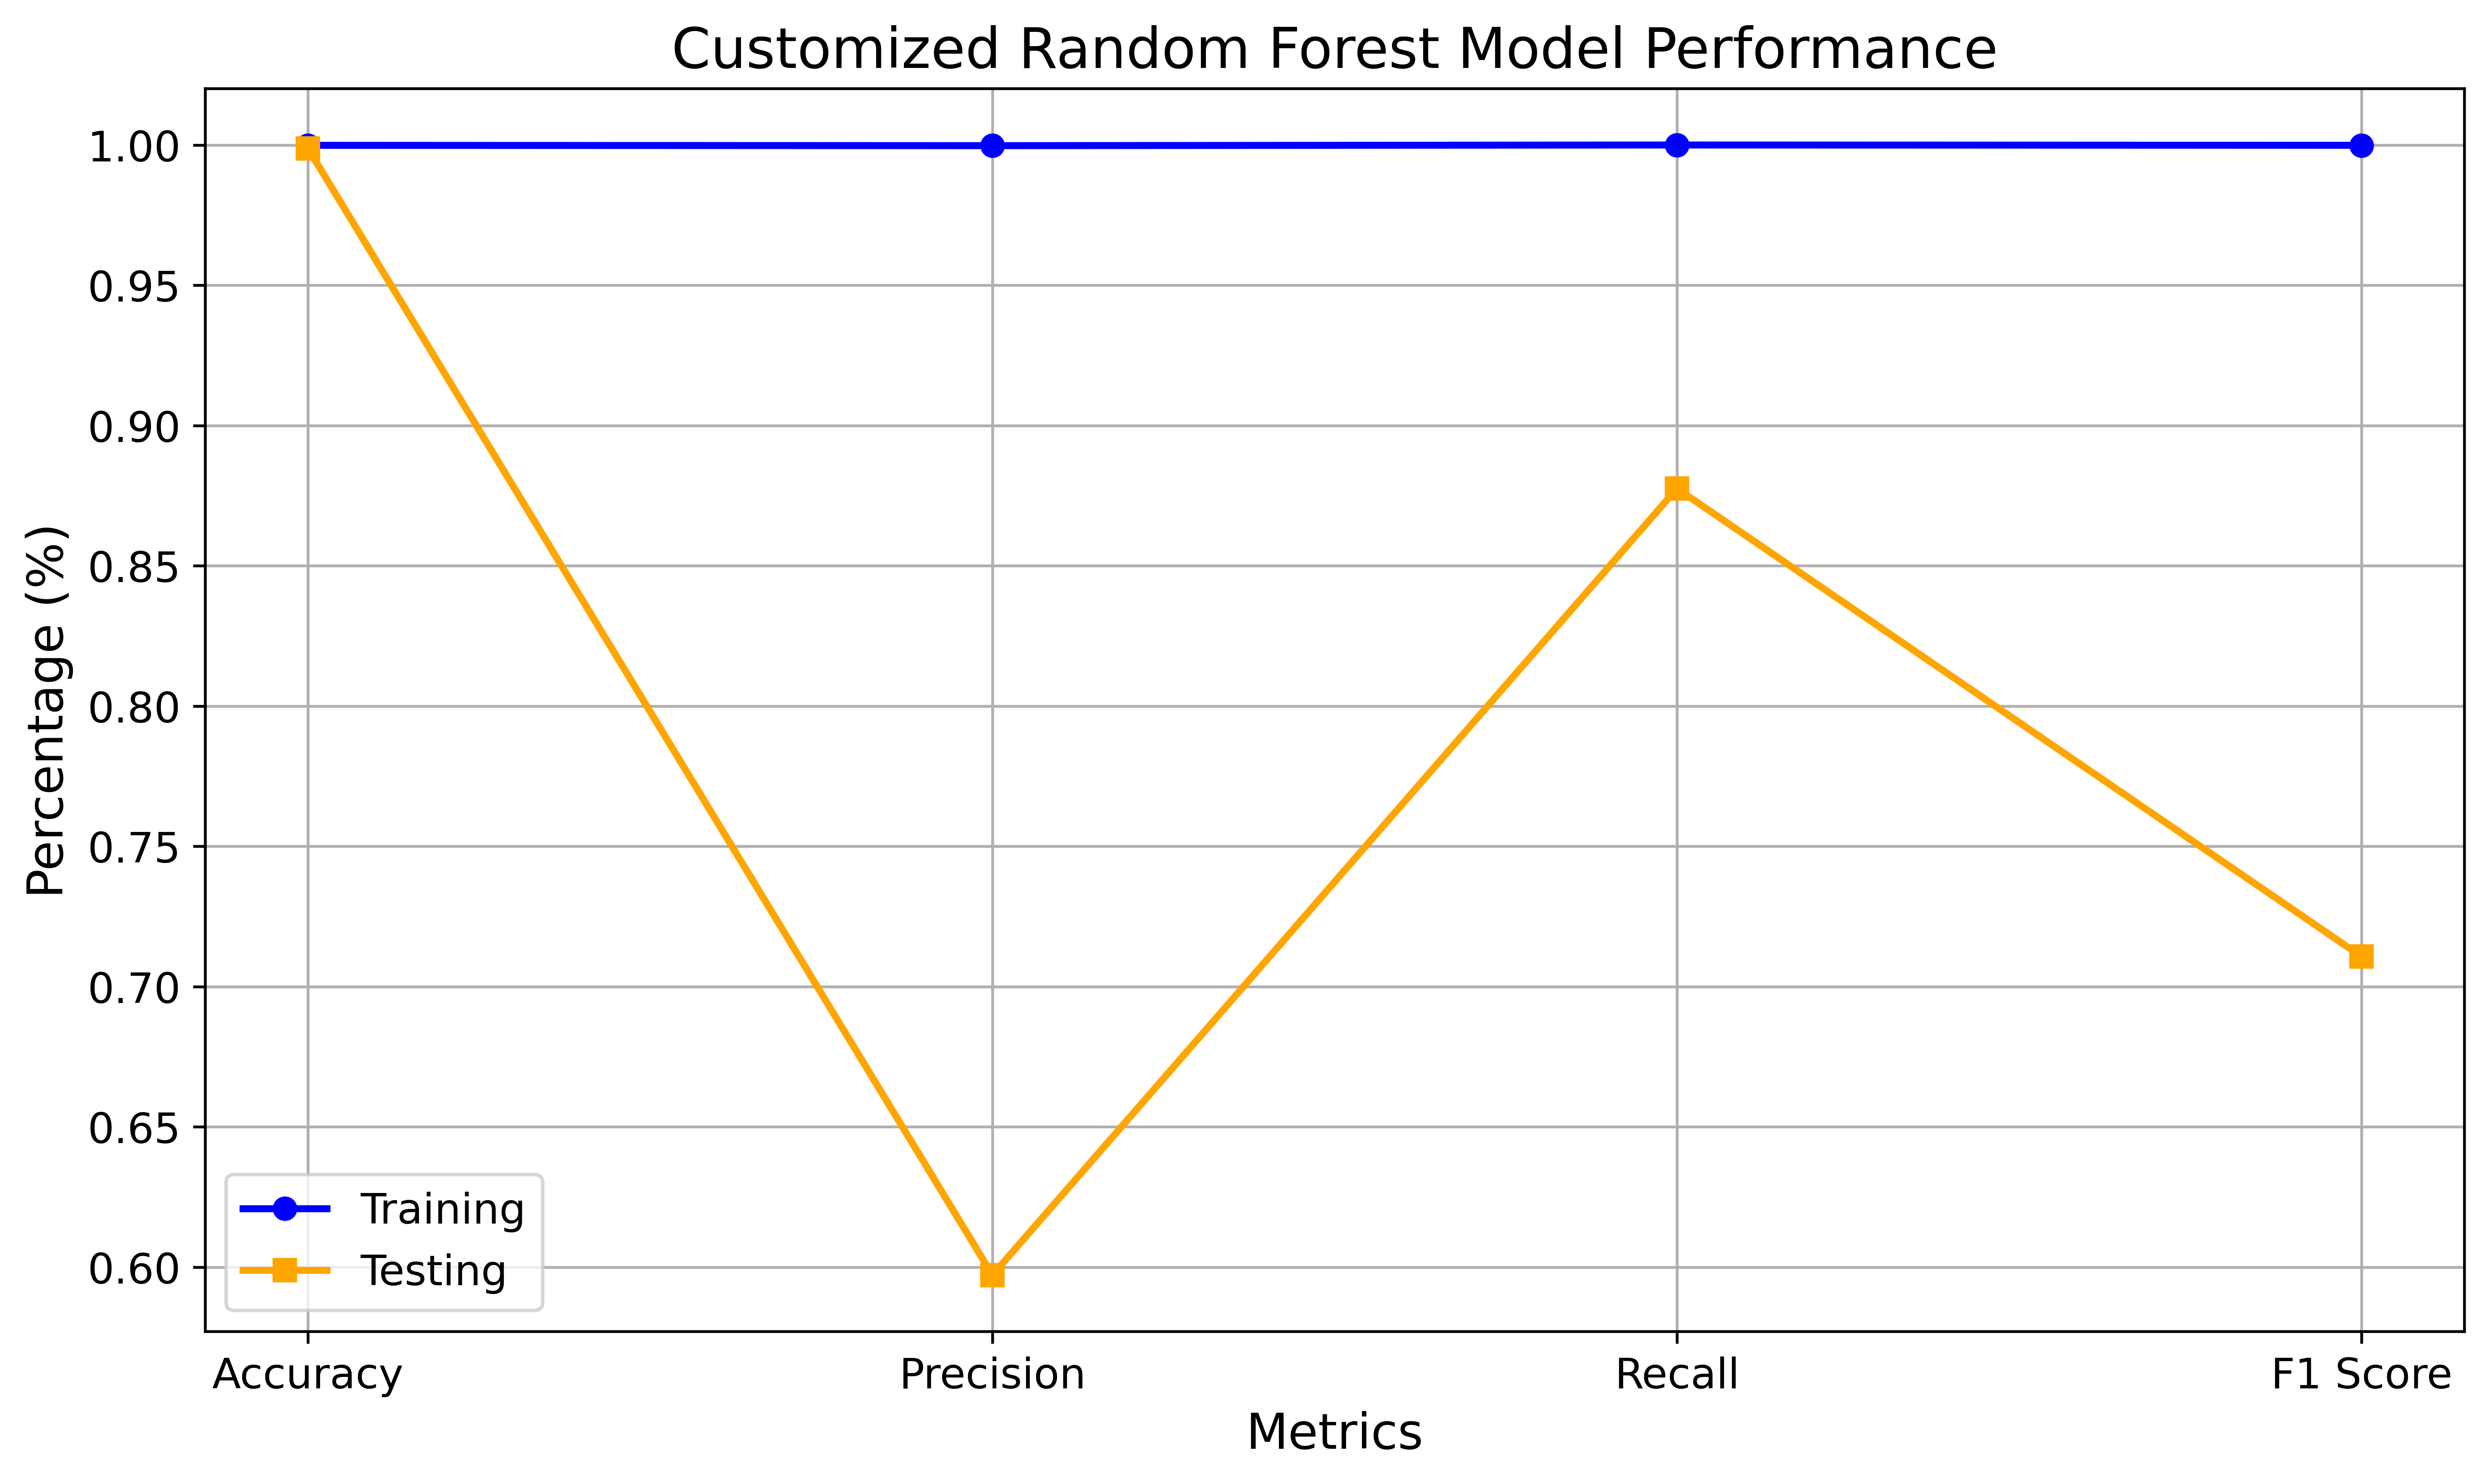

In [ ]:
# Updated Function to plot metrics for a model with clearer visualization
def plot_metrics_curve(model_name, train_metrics, test_metrics, metric_names):
    plt.figure(figsize=(10,6), dpi=600)

    # Plot Training Metrics with blue color and circular markers
    plt.plot(metric_names, train_metrics, label='Training', marker='o', color='blue', linestyle='-', linewidth=2)

    # Plot Testing Metrics with orange color and square markers
    plt.plot(metric_names, test_metrics, label='Testing', marker='s', color='orange', linestyle='-', linewidth=2)

    # Set the title and labels
    plt.title(f'{model_name} Model Performance', fontsize=16)
    plt.xlabel('Metrics', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=14)

    # Set ticks and grid
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

    # Show legend
    plt.legend(loc='best', fontsize=12)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# List of metrics names to use
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot curves for each model (Training and Testing Metrics)
plot_metrics_curve("Decision Tree", train_metrics_list[0], test_metrics_list[0], metric_names)
plot_metrics_curve("Random Forest", train_metrics_list[1], test_metrics_list[1], metric_names)
plot_metrics_curve("SVM", train_metrics_list[2], test_metrics_list[2], metric_names)
plot_metrics_curve("Customized Random Forest", train_metrics_list[3], test_metrics_list[3], metric_names)


In [ ]:
# Step 10: Show device specification
print("Device Specifications:")
print(f"System: {platform.system()}")
print(f"Node: {platform.node()}")
print(f"Release: {platform.release()}")
print(f"Version: {platform.version()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")

Device Specifications:
System: Linux
Node: fbb64d0e441b
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Machine: x86_64
Processor: x86_64


In [ ]:
# Step 12: Save device specification to a README file

def create_readme():
    with open('README.txt', 'w') as f:
        f.write("### Model Training and Evaluation Report\n")
        f.write("This file contains the computing infrastructure used for training the models, instructions to run the code, and additional details.\n\n")
        f.write("#### Computing Infrastructure\n")
        f.write(f"Operating System: {platform.system()}\n")
        f.write(f"Node Name: {platform.node()}\n")
        f.write(f"Release: {platform.release()}\n")
        f.write(f"Version: {platform.version()}\n")
        f.write(f"Machine: {platform.machine()}\n")
        f.write(f"Processor: {platform.processor()}\n\n")
        f.write("#### Instructions to Run\n")
        f.write("1. Install necessary libraries using the following command:\n")
        f.write("```bash\n")
        f.write("pip install -r requirements.txt\n")
        f.write("```\n")
        f.write("2. Load the dataset into the code (replace `df` with your loaded dataset).\n")
        f.write("3. Run the code to evaluate the models.\n")
        f.write("4. View the confusion matrix, accuracy, precision, recall, and F1-score of each model.\n\n")
        f.write("### End of README\n")

# Generate README file
create_readme()

# Step 13: Show device specification
print("Device Specifications:")
print(f"System: {platform.system()}")
print(f"Node: {platform.node()}")
print(f"Release: {platform.release()}")
print(f"Version: {platform.version()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")

Device Specifications:
System: Linux
Node: fbb64d0e441b
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Machine: x86_64
Processor: x86_64


In [ ]:
import platform

# Function to create the README file
def create_readme():
    readme_path = 'README.txt'
    with open(readme_path, 'w') as f:
        f.write("### Model Training and Evaluation Report\n")
        f.write("This file contains the computing infrastructure used for training the models, instructions to run the code, and additional details.\n\n")
        f.write("#### Computing Infrastructure\n")
        f.write(f"Operating System: {platform.system()}\n")
        f.write(f"Node Name: {platform.node()}\n")
        f.write(f"Release: {platform.release()}\n")
        f.write(f"Version: {platform.version()}\n")
        f.write(f"Machine: {platform.machine()}\n")
        f.write(f"Processor: {platform.processor()}\n\n")
        f.write("#### Instructions to Run\n")
        f.write("1. Install necessary libraries using the following command:\n")
        f.write("```bash\n")
        f.write("pip install -r requirements.txt\n")
        f.write("```\n")
        f.write("2. Load the dataset into the code (replace `df` with your loaded dataset).\n")
        f.write("3. Run the code to evaluate the models.\n")
        f.write("4. View the confusion matrix, accuracy, precision, recall, and F1-score of each model.\n\n")
        f.write("### End of README\n")

    print(f"README file has been created at: {readme_path}")

# Generate README file
create_readme()

# Step to show device specification (optional)
print("Device Specifications:")
print(f"System: {platform.system()}")
print(f"Node: {platform.node()}")
print(f"Release: {platform.release()}")
print(f"Version: {platform.version()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")


README file has been created at: README.txt
Device Specifications:
System: Linux
Node: fbb64d0e441b
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Machine: x86_64
Processor: x86_64
